<a id='0'></a>
# <center>Анализ развлекательного приложения Procrastinate Pro+</center>

### Содержание

- [Цель проекта, описание данных, определение задач, этапы проекта.](#1)
    - [Цель проекта](#1_1)
    - [Описание данных](#1_2)
    - [Определение задач](#1_3)
    - [Этапы проекта](#1_4)
- [Настройка окружения](#2)
    - [Загрузка необходимых библиотек](#2_1)
    - [Настройка оформления вывода (out)](#2_2)
    - [Создание необходимых функций для работы](#2_3)
        - [describe_data](#2_3_1)
        - [create_missing_df](#2_3_2)
        - [convert_to_lowercase](#2_3_3)
        - [get_profiles](#2_3_4)
        - [get_retention](#2_3_5)
        - [get_conversion](#2_3_6)
        - [get_ltv](#2_3_7)
        - [filter_data](#2_3_8)
        - [plot_retention](#2_3_9)
        - [plot_conversion](#2_3_10)
        - [plot_ltv_roi](#2_3_11)
- [Загрузка данных и их подготовка к анализу](#3)
    - [visits](#3_1)
    - [orders](#3_2)
    - [costs_info](#3_3)
    - [Вывод](#3_4)
- [Исследовательский анализ данных](#4)
    - [Создание таблицы с профилями пользователей, определение минимальной и максимальной даты привлечения пользователей](#4_1)
    - [Вывод](#4_2)
    - [Страны](#4_3)
    - [Вывод](#4_4)
    - [Устройства](#4_5)
    - [Вывод](#4_6)
    - [Рекламные источники](#4_7)
    - [Вывод](#4_8)
- [Маркетинг](#5)
- [Оценка окупаемости рекламы](#6)
    - [Анализ окупаемости рекламы](#6_1)
    - [Анализ конверсии пользователей и динамика ее изменения](#6_2)
    - [Анализ окупаемости рекламы с разбивкой по устройствам](#6_3)
    - [Анализ окупаемости рекламы с разбивкой по странам](#6_4)
    - [Анализ окупаемости рекламы с разбивкой по рекламным каналам](#6_5)
    - [Вывод](#6_6)
    - [Дополнительно](#6_7)
- [Итоговый вывод](#7)

<a id='1'></a>
### Цель проекта, описание данных,  определение задач, этапы проекта.

<a id='1_1'></a>
#### Цель проекта

Работа в качестве маркетингого аналитика развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. **Цель - разобраться в причинах и помочь компании выйти в плюс**.

<a id='1_2'></a>
#### Описание данных

##### visits_info_short.csv

Хранит лог сервера с информацией о посещениях сайта.


Структура **visits_info_short.csv**:

- User Id — уникальный идентификатор пользователя,
- Region — страна пользователя,
- Device — тип устройства пользователя,
- Channel — идентификатор источника перехода,
- Session Start — дата и время начала сессии,
- Session End — дата и время окончания сессии.

датасет находится по адресу `/datasets/visits_info_short.csv`

##### orders_info_short.csv

Информация о заказах.

Структура **orders_info_short.csv**:
- User Id — уникальный идентификатор пользователя,
- Event Dt — дата и время покупки,
- Revenue — сумма заказа.

датасет находится по адресу `/datasets/orders_info_short.csv`

##### costs_info_short.csv

Информация о расходах на рекламу.

Структура **costs_info_short.csv**:
- dt — дата проведения рекламной кампании,
- Channel — идентификатор рекламного источника,
- costs — расходы на эту кампанию.

датасет находится по адресу `/datasets/costs_info_short.csv`

<a id='1_3'></a>
#### Задачи

- анализ окупаемость рекламы,
- изучение конверсии пользователей и динамики её изменения,
- поиск причин обуславливающие проблемы окупаемости,
- подготовка рекомендаций для рекламного отдела.


<a id='1_4'></a>
#### Этапы проекта

1. Настройка окружения
2. Загрузка данных и подготовка их к анализу
3. Исследовательский анализ данных
4. Маркетинг
5. Оценка окупаемости рекламы
6. Итоговый вывод

<a id='2'></a>
### Настройка окружения

<a id='2_1'></a>
#### Загрузка необходимых библиотек

In [1]:
# must have
import pandas as pd
import numpy as np

# визуализация
import seaborn as sns
import matplotlib.pyplot as plt

# вспомогательные библиотеки
from datetime import datetime, timedelta
import random


<div class="alert alert-success">
<b>Комментарий ревьюера v.1</b> 
    
👍 Хорошо, что все импорты находятся в первой ячейке кода, это соответствует стилю [PEP8](https://www.python.org/dev/peps/pep-0008/) и помогает понять, какое окружение необходимо для запуска проекта. Молодец, что систематизируешь библиотеки.
</div>

<a id='2_2'></a>
#### Настройка оформления вывода (out)

In [2]:
# вывод всех столбцов
pd.set_option('display.max_columns', None)
# отражение текста в ячейке полностью вне зависимости от длины
pd.set_option('display.max_colwidth', None)
# волшебная команда для подробного отображения ошибок
%xmode Verbose
# отображение графиков в ячейках блокнота
%matplotlib inline

Exception reporting mode: Verbose


<a id='2_3'></a>
#### Создание необходимых функций для работы

<a id='2_3_1'></a>
##### describe_data

In [3]:
def describe_data(data):
    """
     Выводит основные характеристики DataFrame, включая:
    - 10 случайных строк из таблицы
    - размерность DataFrame
    - информацию по числовым столбцам
    - информацию по строковым столбцам
    - количество пропусков в таблице
    - количество уникальных значений в каждом столбце
    - количество дублирующихся строк
    - количество уникальных значений в каждом столбце
    """
    # вывод 10 случайных строк
    print('\033[92mвывод случайных строк из таблицы:\033[90m\n')
    # если строк в таблице меньше 10, то выскочит ошибка
    # отлавливаем ее и выводим все имеющиеся строки в таблице
    try:
        display(data.sample(10))
    except:
        display(data.sample(data.shape[0]))
    
    # вывод типов данных в столбцах
    print('Типы данных:')
    print(data.dtypes)
    ('-----------------------------------------------------------------------')
    
    # вывод количества строк
    print('\033[92mКоличество строк:\033[90m', f'\033[91m{data.shape[0]}\033[90m')
    print('-----------------------------------------------------------------------')
    
    # вывод количества столбцов 
    print('\033[92mКоличество столбцов:\033[90m', f'\033[91m{data.shape[1]}\033[90m')
    print('-----------------------------------------------------------------------')
    
    # вывод информации о числовых столбцах
    print('\033[92mИнформация по числовым столбцам:\033[90m\n')
    for column in data.select_dtypes(include='number'):
        print(data[column].describe(), '\n')
        print('-----------------------------------------------------------------------')
    
    # вывод информации об оъектных данных
    print('\033[92mИнформация по строковым столбцам:\033[90m\n')
    for column in data.select_dtypes(include='object'):
        print(data[column].describe(), '\n')
        print('-----------------------------------------------------------------------')
    
    # вывод столбцов, содержащих пропуски, и их количество
    print('\033[92mКоличество пропусков в таблице:\033[90m\n')
    # эта переменная нужно для подсчета столбиков с пропусками
    count_na = 0
    for column in data.columns:
        null_in_column = data[column].isna().sum()
        
        if null_in_column:
            count_na += 1
            print(f'\033[91m{column}: {null_in_column}\033[90m')
            print('-----------------------------------------------------------------------')
    if count_na == 0:
        print('В таблице нет пропусков 🥂')
    
    # вывод информации об уникальных значениях каждого столбца
    print('\033[92mКоличество уникальных значений в каждом столбце:\033[90m\n')
    for column in data.columns:
        unique_values = data[column].nunique()
        print(f'{column} : {unique_values}')
        print('-----------------------------------------------------------------------')
    
    # вывод информации о дублирующих строках
    print('\n')
    duplicated_value = data.duplicated().sum()
    if duplicated_value:
        print(f'Количество дублирующихся строк: \033[91m{duplicated_value}\033[90m')
    else:
        print('\033[94mДублирующихся строк не обнаружено\033[90m')
    print('\n')

<a id='2_3_2'></a>
##### create_missing_df

In [4]:
def create_missing_df(data):
    """
    функция, которая сформирует нам таблицу с количеством пропусков и вернет ее
    на вход принимает только один параметр - DataFrame
    """
    # формируем дф с количеством пропусков в столбцах
    missing_df = data.isna().sum(axis=0).reset_index()
    # переименуем колонки
    missing_df.columns = ['column_name', 'missing_count']
    # фильтрация
    missing_df = missing_df[missing_df['missing_count'] > 0]
    missing_df = missing_df.sort_values('missing_count', ascending=True)
    # считаем % пропусков от общего
    missing_df['%'] = np.round((missing_df['missing_count'] / data.shape[0])*100, 2)
    return missing_df

<a id='2_3_3'></a>
##### convert_to_lowercase

In [5]:
def convert_to_lowercase(data):
    """
    Функция приводит к нижнему регистру значения столбцов и строк из DataFrame,
    в наименованиях столбцов заменяет пробелы на андерскор,
    возвращает обновленный DataFrame
    Параметры:
    - data: исходные данные.
    """
    # приведение значения столбцов к нижнему регистру
    data.columns = data.columns.str.lower()
    # замена пробелов на андерскор
    data.columns = data.columns.str.replace(' ', '_')
    
    # работа со значениями в строчках только с типом данных object
    for column in data.select_dtypes(include='object'):
        data[column] = data[column].str.lower()
    
    # возвращаем обновленную таблицу
    return data

<div class="alert alert-success">
<b>Комментарий ревьюера v.1</b> 
    
👍 Супер! Молодец, что предусмотрел функции на многие случае обработки данных! Кстати, можно совместить несколько  строковых функций в одной строке - `visits.columns = visits.columns.str.lower().str.replace(' ', '_')`
    
Еще отмечу аккуратное оформление функций - есть описание и параметры. Отличный подход! Коллеги будут благодарны, да и самому полезно, если нужно вернуться к проекту через какое-то время.
</div>

<a id='2_3_4'></a>
##### get_profiles

In [6]:
def get_profiles(sessions, 
                 orders,  
                 ad_costs
                ):
    """
    Функция предназначена для создания таблицы с профилем клиентов. Она принимает следующие параметры:
    orders: датафрейм с заказами.
    ad_costs: датафрейм с затратами на рекламу.
    """

    # сортируем сессии по ID пользователя и дате привлечения
    # группируем по ID и находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
         # время первого посещения назовём first_ts
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()  # возвращаем user_id из индекса
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())


    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
         # столбец с числом пользователей назовём unique_users
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()  # возвращаем dt и channel из индексов
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    # по дате и каналу привлечения
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    # результаты сохраним в столбец acquisition_cost (CAC)
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавим стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left'
    )

    # органические пользователи не связаны с данными о рекламе,
    # поэтому в столбце acquisition_cost у них значения NaN
    # заменим их на ноль, ведь стоимость привлечения равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)
    
    return profiles  # возвращаем профили с CAC

<a id='2_3_5'></a>
##### get_retention

In [7]:
def get_retention(profiles, 
                  sessions, 
                  observation_date, 
                  horizon_days, 
                  dimensions = [], 
                  ignore_horizon = False
                 ):
    
    # решаем какие столбцы оставим для группировки удержания, столбец признака платящего пользователя остается всегда
    dimensions = ['payer'] + dimensions
    
    # оттсекаем всех пользователей, которые не могли "дожить" до нужного горизонта 
    # (присоединились позже чем observation_date - horizon)
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(days = horizon_days - 1)
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # формируем массив сырых данных
    result_raw = result_raw.merge(sessions[['user_id', 'session_start']], on = 'user_id', how = 'left')
    result_raw['lifetime'] = (result_raw['session_start'] - result_raw['first_ts']).dt.days
    
    # функция группировки по нужному набору измерений
    def group_by_dimensions(df, dims, horizon_days):     
        result = df.pivot_table(index = dims, columns = 'lifetime', values = 'user_id', aggfunc = 'nunique')     # строим "треугольную таблицу" 
        cohort_sizes = df.groupby(dims).agg({'user_id': 'nunique'}).rename(columns = {'user_id': 'cohort_size'}) # определяем размеры когорт
        result = cohort_sizes.merge(result, on = dims, how = 'left').fillna(0)                                   # присоединяем размеры когорт к треугольной таблице
        result = result.div(result['cohort_size'], axis = 0)                                                     # делим каждый из столбцов на размер когорты - расчитываем % удержания (retention rate)
        result = result[['cohort_size'] + list(range(horizon_days))]                                             # оставляем только наблюдения до нужного горизонта и столбец размеров когорт
        result['cohort_size'] = cohort_sizes                                                                     # пересприсваиваем столбец размеров когорт, ведь во время деления он превратился в 1
        return result
    
    # расчитываем удержание 
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)
    
    # рассчитываем удержание по всем параметрам + дата
    result_in_time = group_by_dimensions(result_raw, dimensions + ['dt'], horizon_days)
    
    # возвращаем и таблицы удержания и сырые данные (чтобы в случае чего можно было в них покопаться при отладке)
    return result_raw, result_grouped, result_in_time

<a id='2_3_6'></a>
##### get_conversion

In [8]:
def get_conversion(profiles,
                   purchases,
                   observation_date,
                   horizon_days,
                   dimensions=[],
                   ignore_horizon=False,
                  ):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

<a id='2_3_7'></a>
##### get_ltv

In [9]:
def get_ltv(profiles, 
            purchases,
            observation_date, 
            horizon_days,
            dimensions=[], 
            ignore_horizon=False,
           ):
    
    """
    Функция предназначена для расчета пожизненной ценности (LTV) клиентов. Она принимает следующие параметры:
    profiles: датафрейм с данными о профилях пользователей.
    purchases: датафрейм с данными о покупках пользователей.
    observation_date: дата, по состоянию на которую рассчитывается LTV.
    horizon_days: горизонт анализа в днях.
    dimensions: список дополнительных измерений, по которым будет группироваться LTV.
    ignore_horizon: флаг, указывающий, учитывать ли горизонт анализа при расчете LTV.
    """
    
    # исключаем пользователей, не «доживших» до горизонта анализа
    # Функция принимает на вход дату наблюдения observation_date, которая определяет конец горизонта анализа. 
    # Для каждого пользователя, который совершил первую покупку после observation_date, мы считаем, что его LTV равен нулю.
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    # Функция query() используется для фильтрации данных датафрейма profiles 
    # по условию dt <= @last_suitable_acquisition_date, 
    # где last_suitable_acquisition_date - дата, по состоянию на которую рассчитывается LTV.
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    
    # добавляем данные о покупках в профили
    # Для вычисления LTV нам необходимо знать, когда пользователь совершил первую покупку и сколько раз он покупал после этого. 
    # Для этого мы объединяем таблицы profiles и purchases по полю user_id
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    
    # рассчитываем лайфтайм пользователя для каждой покупки
    # Лайфтайм пользователя - это период времени с момента его первой покупки до момента совершения последней. 
    # Рассчитываем лайфтайм как разницу между датами покупки и привлечения пользователя.
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        """
        Функция group_by_dimensions принимает на вход таблицу (в нашем случае result_raw)
        horizon_days: горизонт анализа в днях.
        dimensions: список дополнительных измерений, по которым будет группироваться LTV 
        
        и возвращает две таблицы:

        result - таблица LTV, в которой каждая строка соответствует когорте и лайфтайму. 
        В ячейках таблицы содержится суммарная выручка от пользователей, совершивших покупку в этой когорте и за этот лайфтайм.
        
        roi - таблица ROI, в которой каждая строка соответствует когорте и лайфтайму. 
        В ячейках таблицы содержится отношение LTV к CAC.
        """
        
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(index=dims, 
                                columns='lifetime', 
                                values='revenue', 
                                aggfunc='sum'
                               )
        
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # сохраняем в датафрейм данные пользователей и значения CAC, 
        # добавив параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []
    
    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

<a id='2_3_8'></a>
##### filter_data

In [10]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

<a id='2_3_9'></a>
##### plot_retention

In [11]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()

<a id='2_3_10'></a>
##### plot_conversion

In [12]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

<a id='2_3_11'></a>
##### plot_ltv_roi

In [13]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()

Подгружены все необходимые библиотеки и модули, добавлена красота и интерактивность, созданы необходимые функции. **Подготовка к работе с данными завершена.**

<div class="alert alert-success">
<b>Комментарий ревьюера v.1</b> 
    
👍 Тут все хорошо, молодец, что все действия по настройке окружения и загрузки функций сделал в начале проекта.
</div>

<a id='3'></a>
### Загрузка данных и их подготовка к анализу

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

<a id='3_1'></a>
#### visits

In [14]:
# чтение данных
visits = pd.read_csv('/datasets/visits_info_short.csv')

In [15]:
# знакомство с данными
describe_data(visits)

вывод случайных строк из таблицы:



,User Id,Region,Device,Channel,Session Start,Session End
85673,352513691317,United States,Android,TipTop,2019-07-25 05:36:30,2019-07-25 06:19:39
233776,702593502703,Germany,Android,OppleCreativeMedia,2019-06-24 14:03:46,2019-06-24 14:12:04
125295,902521081478,United States,iPhone,organic,2019-08-28 10:32:54,2019-08-28 11:33:02
176729,127009525756,United States,iPhone,organic,2019-10-06 23:02:38,2019-10-06 23:10:26
309491,696362669362,France,PC,LeapBob,2019-10-30 11:33:15,2019-10-30 11:40:02
6137,578339629528,United States,Mac,FaceBoom,2019-05-08 01:31:51,2019-05-08 01:32:21
151513,539118157636,United States,Mac,organic,2019-09-20 12:31:05,2019-09-20 13:01:51
227795,3791599501,France,iPhone,lambdaMediaAds,2019-06-11 06:13:37,2019-06-11 06:17:19
291147,964828381727,UK,Android,organic,2019-10-01 06:59:07,2019-10-01 08:22:17
260170,99042660222,Germany,iPhone,LeapBob,2019-08-12 09:50:35,2019-08-12 09:57:32


Типы данных:
User Id           int64
Region           object
Device           object
Channel          object
Session Start    object
Session End      object
dtype: object
Количество строк: 309901
-----------------------------------------------------------------------
Количество столбцов: 6
-----------------------------------------------------------------------
Информация по числовым столбцам:

count    3.099010e+05
mean     4.997664e+11
std      2.887899e+11
min      5.993260e+05
25%      2.493691e+11
50%      4.989906e+11
75%      7.495211e+11
max      9.999996e+11
Name: User Id, dtype: float64 

-----------------------------------------------------------------------
Информация по строковым столбцам:

count            309901
unique                4
top       United States
freq             207327
Name: Region, dtype: object 

-----------------------------------------------------------------------
count     309901
unique         4
top       iPhone
freq      112603
Name: Device, dtype: o

При первом ознакомлении с таблицей visits можно сделать следующие выводы:
- в таблице присутствуют 309_901 записей о посещениях 150_008 пользователей из 4 стран (Франция, Германия, США, Великобритания) и с 4 видами устройств (айфоны, андроиды, компьютеры, маки)
- больше половина пользователей из Америки
- треть пользователей посещали сайт с помощью айфона
- треть пользователей посетили сайт из результатов обычной поисковой выдачи, а не с рекламных объявлений (бесплатно)
- в таблице отсутствуют пропуски и дублирующиеся строки

Многие данные в таблице требуют предобработки, а именно:
- привести наименования колонок к нижнему регистру и заменить пробел на нижнее подчеркивание (андерскор)
- привести значения строк к нижнему регистру
- тип данных столбцов с датой и временем сессий некорректный (object) привести к datetime

<div class="alert alert-success">
<b>Комментарий ревьюера v.1</b> 
    
👍 Тут тоже все по делу. Отдельно отмечу детальный уровень изучения входных данных! Это хороший подход - который позволит избежать невынужденных ошибок при работе с данными. Плюс сейчас уже получено много важной информации - можно получить представление о пользователях.
</div>

In [16]:
# используем функцию для приведения к нижнему регистру значения столбцов и строк и тд.
visits = convert_to_lowercase(visits)
# проверяем результат
visits.sample(10)

,user_id,region,device,channel,session_start,session_end
11109,239960673482,united states,mac,organic,2019-05-13 06:21:48,2019-05-13 06:41:13
38948,966589912307,united states,iphone,faceboom,2019-06-10 00:04:31,2019-06-10 00:13:42
33051,107798036719,united states,android,organic,2019-06-03 04:41:50,2019-06-03 05:25:23
291889,154900559795,germany,android,leapbob,2019-10-02 05:56:00,2019-10-02 05:57:52
253427,812132849662,germany,iphone,opplecreativemedia,2019-08-01 08:08:37,2019-08-01 09:07:11
71412,734008576847,united states,mac,organic,2019-07-10 22:26:46,2019-07-10 22:27:36
64537,692808645513,united states,pc,yrabbit,2019-07-04 16:50:22,2019-07-04 17:37:15
6535,347589146139,united states,mac,organic,2019-05-08 22:27:07,2019-05-08 22:41:29
270962,907780913205,germany,pc,leapbob,2019-08-30 17:19:59,2019-08-30 17:37:20
128789,792851466425,united states,mac,organic,2019-08-31 23:31:59,2019-08-31 23:45:17


In [17]:
# преобразуем данные о времени
visits.session_start = pd.to_datetime(visits.session_start)
visits.session_end = pd.to_datetime(visits.session_end)
visits[['session_start', 'session_end']].dtypes

session_start    datetime64[ns]
session_end      datetime64[ns]
dtype: object

<a id='3_2'></a>
#### orders

In [18]:
# чтение данных
orders = pd.read_csv('/datasets/orders_info_short.csv')

In [19]:
# знакомство с данными
describe_data(orders)

вывод случайных строк из таблицы:



,User Id,Event Dt,Revenue
11462,739891163648,2019-08-08 00:55:01,4.99
37470,616271209964,2019-10-04 12:09:37,4.99
2727,948071847997,2019-06-07 00:50:16,4.99
23610,145370271383,2019-10-11 21:57:46,4.99
26844,860150955196,2019-10-26 06:25:45,4.99
22179,419639094867,2019-10-05 16:43:05,4.99
21229,537218478715,2019-09-30 04:44:33,4.99
30815,314796597541,2019-07-10 14:18:15,4.99
35922,866994469065,2019-09-18 10:44:08,4.99
4288,750419810153,2019-06-21 01:16:11,19.99


Типы данных:
User Id       int64
Event Dt     object
Revenue     float64
dtype: object
Количество строк: 40212
-----------------------------------------------------------------------
Количество столбцов: 3
-----------------------------------------------------------------------
Информация по числовым столбцам:

count    4.021200e+04
mean     4.990295e+11
std      2.860937e+11
min      5.993260e+05
25%      2.511324e+11
50%      4.982840e+11
75%      7.433327e+11
max      9.998954e+11
Name: User Id, dtype: float64 

-----------------------------------------------------------------------
count    40212.000000
mean         5.370608
std          3.454208
min          4.990000
25%          4.990000
50%          4.990000
75%          4.990000
max         49.990000
Name: Revenue, dtype: float64 

-----------------------------------------------------------------------
Информация по строковым столбцам:

count                   40212
unique                  40163
top       2019-10-26 06:49:22
fre

Максимальное значение в столцбе revenue 49.99, посмотрим не ошибка ли это

In [20]:
orders.Revenue.value_counts()

4.99     38631
5.99       780
9.99       385
49.99      212
19.99      204
Name: Revenue, dtype: int64

Значений много и они разнообразны, всё нормально

<div class="alert alert-success">
<b>Комментарий ревьюера v.1</b> 
    
👍 Можно еще отметить, что значения дискретны - видимо, это стоимость подписок на определённый  развлекательный контент.
</div>

При первом ознакомлении с таблицей orders можно сделать следующие выводы:

В таблице присутствуют 40_212 записей о покупках 8881 пользователей
3 столбца с айди пользователя, датой покупки и доходом
почти 90% дохода с одного заказа это - 4.99$

Столбец с датой необохдимо привести к соответствующему типу данных, а также привести наименования колонок к нижнему регистру и заменить пробел на нижнее подчеркивание (андерскор)

<div class="alert alert-success">
<b>Комментарий ревьюера v.1</b> 
    
👍 Кстати, `value_counts()` может сразу доли подсчитать: `value_counts(normalize=True)`
</div>

In [21]:
# используем функцию для приведения к нижнему регистру значения столбцов и строк и тд
convert_to_lowercase(orders)
orders.sample(10)

,user_id,event_dt,revenue
18272,512492229288,2019-09-16 07:32:19,4.99
26204,967201011508,2019-10-23 10:31:43,5.99
1454,611135863057,2019-05-25 18:35:28,4.99
28084,955261815521,2019-05-07 17:57:09,4.99
1848,872603416278,2019-05-29 06:48:14,5.99
37133,649616333931,2019-10-01 20:48:09,4.99
39786,776633241815,2019-10-27 13:12:25,4.99
32652,947691461774,2019-08-08 07:22:37,5.99
23754,471959614502,2019-10-12 01:37:28,4.99
1175,452887618064,2019-05-21 19:09:20,4.99


In [22]:
# преобразуем данные о времени
orders.event_dt = pd.to_datetime(orders.event_dt)
orders.event_dt.dtypes

dtype('<M8[ns]')

In [23]:
np.dtype('datetime64[ns]') == np.dtype('<M8[ns]')

True

В процессе преобразования данных о времени появился тип данных **<M8[ns]** отличный от привычного datetime64[ns], такое бывает и тип данных datetime64[ns] и <M8[ns] являются эквивалентными и предназначены для работы с датами и временем в numpy и pandas.

<div class="alert alert-success">
<b>Комментарий ревьюера v.1</b> 
    
👍 Верно! Здорово, что добавляешь важную информацию.
</div>

<a id='3_3'></a>
#### costs_info

In [24]:
# чтение данных
costs_info = pd.read_csv('/datasets/costs_info_short.csv')

In [25]:
# знакомство с данными
describe_data(costs_info)

вывод случайных строк из таблицы:



,dt,Channel,costs
1402,2019-09-20,OppleCreativeMedia,18.75
532,2019-10-20,RocketSuperAds,7.80
1744,2019-09-02,lambdaMediaAds,10.40
851,2019-09-09,YRabbit,3.36
1185,2019-08-14,LeapBob,8.82
1008,2019-08-17,AdNonSense,14.70
664,2019-09-02,TipTop,354.00
848,2019-09-06,YRabbit,4.56
210,2019-05-31,MediaTornado,5.76
744,2019-05-25,YRabbit,10.50


Типы данных:
dt          object
Channel     object
costs      float64
dtype: object
Количество строк: 1800
-----------------------------------------------------------------------
Количество столбцов: 3
-----------------------------------------------------------------------
Информация по числовым столбцам:

count    1800.000000
mean       58.609611
std       107.740223
min         0.800000
25%         6.495000
50%        12.285000
75%        33.600000
max       630.000000
Name: costs, dtype: float64 

-----------------------------------------------------------------------
Информация по строковым столбцам:

count           1800
unique           180
top       2019-10-11
freq              10
Name: dt, dtype: object 

-----------------------------------------------------------------------
count        1800
unique         10
top       YRabbit
freq          180
Name: Channel, dtype: object 

-----------------------------------------------------------------------
Количество пропусков в таблице

In [26]:
# взглянем на сумму трат в каждой категории
costs_info.groupby('Channel')['costs'].sum().sort_values()

Channel
YRabbit                 944.22
MediaTornado            954.48
lambdaMediaAds         1557.60
LeapBob                1797.60
RocketSuperAds         1833.00
OppleCreativeMedia     2151.25
AdNonSense             3911.25
WahooNetBanner         5151.00
FaceBoom              32445.60
TipTop                54751.30
Name: costs, dtype: float64

При первом ознакомлении с таблицей costs_info можно сделать следующие выводы:

в таблице присутствуют 1800 записей о расходах на рекламу для 10 источников (стоит отметить, что каналов продаж 10, тогда как в таблице visits каналов 11, это связано с источником **organic**, на который не требуются расходы.
FaceBoom упоминается в таблице больше всего, но больше денег тратится на TipTop

Многие данные в таблице требуют предобработки, а именно:

Необходио привести:
- наименования колонок к нижнему регистру 
- привести значения строк к нижнему регистру
- тип данных столбцов с датой и временем к datetime

In [27]:
# используем функцию для приведения к нижнему регистру значения столбцов и строк и тд
convert_to_lowercase(costs_info)
costs_info.sample(10)

,dt,channel,costs
146,2019-09-24,faceboom,243.10
1149,2019-07-09,leapbob,7.98
1054,2019-10-02,adnonsense,17.85
1176,2019-08-05,leapbob,10.71
891,2019-10-19,yrabbit,5.67
1215,2019-09-13,leapbob,9.03
1171,2019-07-31,leapbob,11.13
821,2019-08-10,yrabbit,4.20
1479,2019-06-09,wahoonetbanner,33.60
882,2019-10-10,yrabbit,5.28


In [28]:
# преобразуем данные о времени
costs_info.dt = pd.to_datetime(costs_info.dt).dt.date
costs_info.dt.dtypes

dtype('O')

<a id='3_4'></a>
#### Вывод

После проведения создания необходимых функций, в том числе для расчета и анализа LTV, ROI, удержания и конверсии, ознакомления и предобработки данных, мы можем с уверенностью перейти к следующему этапу - исследовательскому анализу данных. Мы успешно обработали и подготовили данные для дальнейшего анализа, включая приведение данных к нужным форматам и т.д.

<div class="alert alert-success">
<b>Комментарий ревьюера v.1</b> 
    
👍 Отличная работа на стадии загрузки и знакомства с данными. В целом мы получили данные в хорошем качестве - пропусков и дубликатов не было, оставалось только скорректировать названия столбцов и тип данных. Данные хорошего качества, но еще можно было бы проверить даты - что начало сессии действительно раньше, чем окончание. Очень редко по практике, но попадаются такие случаи.
</div>

<a id='4'></a>
### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

<a id='4_1'></a>
#### Создание таблицы с профилями пользователей, определение минимальной и максимальной даты привлечения пользователей.

In [29]:
profiles = get_profiles(visits, orders, costs_info)

In [30]:
describe_data(profiles)

вывод случайных строк из таблицы:



,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
104364,695817537312,2019-07-23 19:49:23,faceboom,mac,united states,2019-07-23,2019-07-01,False,1.127273
131196,875154532899,2019-09-22 05:13:28,organic,android,united states,2019-09-22,2019-09-01,False,0.000000
57658,382715513691,2019-09-16 08:06:13,organic,android,germany,2019-09-16,2019-09-01,False,0.000000
146770,978803679251,2019-05-25 01:38:16,organic,pc,united states,2019-05-25,2019-05-01,False,0.000000
102631,684089338750,2019-09-25 18:56:16,organic,iphone,uk,2019-09-25,2019-09-01,False,0.000000
147419,982840561820,2019-08-06 02:12:14,organic,mac,france,2019-08-06,2019-08-01,True,0.000000
148472,989808172280,2019-10-16 21:38:23,opplecreativemedia,android,uk,2019-10-16,2019-10-01,False,0.262821
131077,874288388297,2019-07-05 15:18:13,faceboom,mac,united states,2019-07-05,2019-07-01,False,1.120465
114435,762659310443,2019-05-25 20:22:57,organic,iphone,united states,2019-05-25,2019-05-01,False,0.000000
10520,70091438177,2019-08-13 01:33:51,yrabbit,iphone,united states,2019-08-13,2019-08-01,False,0.170625


Типы данных:
user_id                      int64
first_ts            datetime64[ns]
channel                     object
device                      object
region                      object
dt                          object
month               datetime64[ns]
payer                         bool
acquisition_cost           float64
dtype: object
Количество строк: 150008
-----------------------------------------------------------------------
Количество столбцов: 9
-----------------------------------------------------------------------
Информация по числовым столбцам:

count    1.500080e+05
mean     4.993238e+11
std      2.889483e+11
min      5.993260e+05
25%      2.489249e+11
50%      4.977046e+11
75%      7.494919e+11
max      9.999996e+11
Name: user_id, dtype: float64 

-----------------------------------------------------------------------
count    150008.000000
mean          0.703278
std           0.954097
min           0.000000
25%           0.000000
50%           0.247500
75%           

In [31]:
# Момент анализа определим исходя из максимальной даты в наших данных
observation_date = profiles.dt.max()

# бизнес-план компании подразумевает окупаемость привлеченных пользователей в течении 14
# следовательно горизонт анализа 14 дней
horizon_days = 14

# минимальная дата привлечения равна минимальной дате в наших данных
min_analysis_date = profiles.dt.min()

# вычисляем максимальную дату привлечения пользователей
max_analysis_date = observation_date - timedelta(days=horizon_days - 1)

print(f'Момент анализа - {observation_date}; \nГоризонт анализа - {horizon_days} дней;' 
      f'\nМинимальная дата привлечения - {min_analysis_date}; \nМаксимальная дата привлечения - {max_analysis_date}.')

Момент анализа - 2019-10-27; 
Горизонт анализа - 14 дней;
Минимальная дата привлечения - 2019-05-01; 
Максимальная дата привлечения - 2019-10-14.


<a id='4_2'></a>
#### Вывод

При первом ознакомлении с новой созданной таблицей profiles, которая содержит профили пользователей, можно сделать следующие выводы:

в таблице присутствуют 150_008 записей о пользователях из 4 стран (Франция, Германия, США, Великобритания) и с 4 видами устройств (айфоны, андроиды, компьютеры, маки)
больше половина пользователей из Америки
треть пользователей посещали сайт с помощью айфона
треть пользователей посетили сайт из результатов обычной поисковой выдачи, а не с рекламных объявлений (бесплатно)
в таблице отсутствуют пропуски и дублирующиеся строки

В ходе работы были определены: 
- Момент анализа - 2019-10-27; 
- Горизонт анализа - 14 дней;
- Минимальная дата привлечения - 2019-05-01; 
- Максимальная дата привлечения - 2019-10-14.

<div class="alert alert-warning">
<b>Комментарий ревьюера v.1</b> 

📝 По выводам все верно, однако обрати, пожалуйста, внимание на такой момент: в этом проекте и аналогичных кейсах фильтрацию с учетом горизонта анализа можно сделать на стадии изучения метрик в динамике или на определенный момент лайфтайма - сейчас мы отфильтровали дату регистрации, но не отфильтровали события по метке в 14 дней. Это нужно учитывать (получаются, что все равно разные пользователи имеют различный горизонт событий, но не меньше 14 дней). Поэтому, в этом блоке - можно смотреть по общим данным, или фильтровать события по значению лайфтайма (как в основном блоке по изучению метрик).
    
</div>

<a id='4_3'></a>
#### Страны 
Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.

In [32]:
# создаем сводную таблицу с помощью метода crosstab + сортируем по возрастаанию таблицу по столбцу платящих + сбрасываем индексы
region_df = pd.crosstab(profiles['region'], profiles['payer'], margins=True, margins_name='total').sort_values(True, ascending=False)
# переименуем названия колонок
region_df.columns= ['not_payer', 'payer', 'total']
# создадим отдельный столбец с долей платящих из каждой страны
region_df['ratio_payer'] = (region_df.payer / region_df.total * 100).round(2)
# выводим на экран
region_df

,not_payer,payer,total,ratio_payer
region,,,,
total,141127,8881,150008,5.92
united states,93100,6902,100002,6.90
uk,16875,700,17575,3.98
france,16787,663,17450,3.80
germany,14365,616,14981,4.11


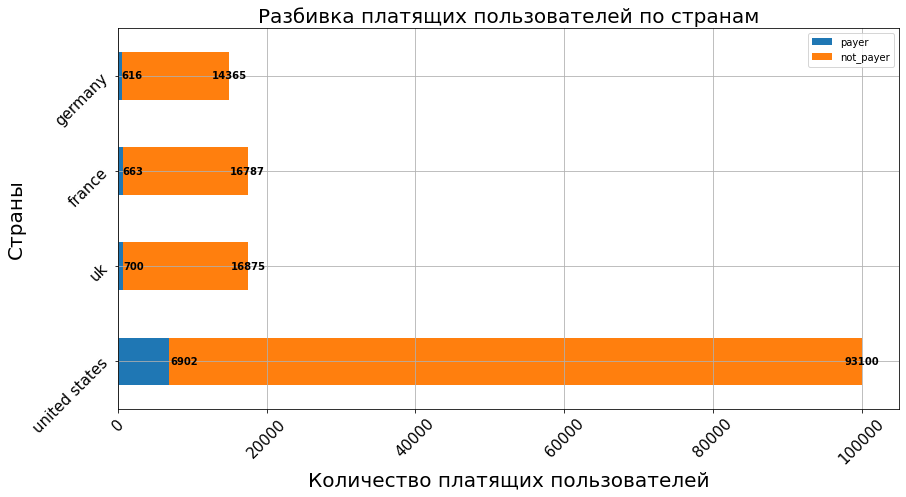

In [33]:
ax = region_df.loc['united states':, ['payer', 'not_payer']].plot.barh(stacked=True, figsize=(14,7))

# стилизация
plt.title('Разбивка платящих пользователей по странам', fontsize=20)
plt.ylabel('Страны', fontsize=20)
plt.xlabel('Количество платящих пользователей', fontsize=20)

plt.xticks(rotation=45, fontsize=15)
plt.yticks(rotation=45, fontsize=15)
plt.grid()

# аннотация
# убил на эту аннотацию буквально целый день
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if left == 0.0 and width == 6902.0:
        plt.annotate(str(int(width)), xy=(left+width*1.3, bottom+height/2), 
                ha='center', va='center', fontweight='bold')
    elif left == 0.0 and width != 6902.0:
        plt.annotate(str(int(width)), xy=(left+width*3, bottom+height/2), 
                ha='center', va='center', fontweight='bold')
    else:
        plt.annotate(str(int(width)), xy=(left+width, bottom+height/2), 
                    ha='center', va='center', fontweight='bold')

None

<a id='4_4'></a>
#### Вывод

США - лидер по количеству привлеченных пользователей и платящих пользователей. Франция и Великобритания следуют за США по количеству пользователей, но отстают по количеству платящих пользователей. Германия имеет меньше всего пользователей, но по доле платящих пользователей занимает второе место.

<div class="alert alert-success">
<b>Комментарий ревьюера v.1</b> 
    
👍 Тут все корректно - получается, что основной объем аудитории приходит из `США`. Также эти пользователи показывают наибольший переход в покупатели. Можно резюмировать, что `США` - наш основной рынок. По количеству пользователей из других регионов можно отметить, что может быть происходит оценка перспектив выхода на другие рынки. Здорово, что данные итоговые данные  представлены в одной компактной таблице и есть визуализация результатов.

    
</div>

<a id='4_5'></a>
#### Устройства
Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

In [34]:
# создаем сводную таблицу с помощью метода crosstab + сортируем по возрастаанию таблицу по столбцу платящих + сбрасываем индексы
device_df = pd.crosstab(profiles['device'], profiles['payer'], margins=True, margins_name='total').sort_values(True, ascending=False)
# переименуем названия колонок
device_df.columns= ['not_payer', 'payer', 'total']
# создадим отдельный столбец с долей платящих по каждому устройству
device_df['ratio_payer'] = (device_df.payer / device_df.total * 100).round(2)
# выводим на экран
device_df

,not_payer,payer,total,ratio_payer
device,,,,
total,141127,8881,150008,5.92
iphone,51097,3382,54479,6.21
android,32982,2050,35032,5.85
mac,28130,1912,30042,6.36
pc,28918,1537,30455,5.05


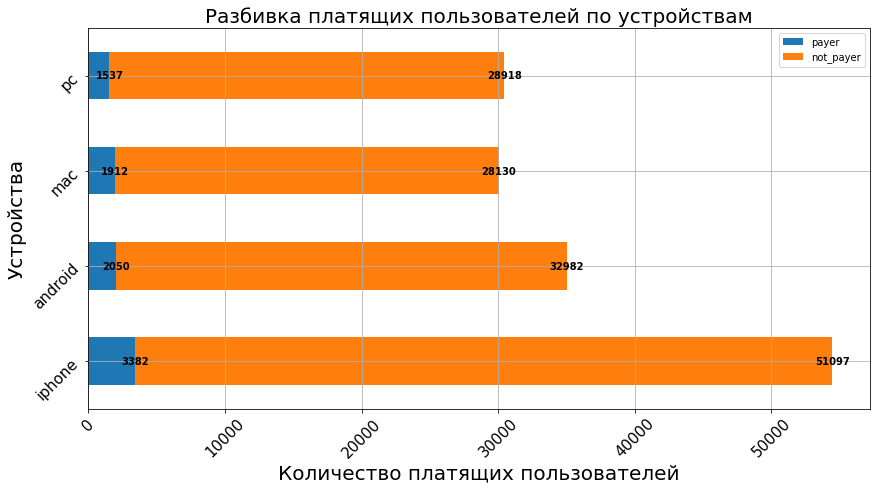

In [35]:
ax = device_df.loc['iphone':, ['payer', 'not_payer']].plot(kind='barh', stacked=True, figsize=(14,7))

# стилизация
plt.title('Разбивка платящих пользователей по устройствам', fontsize=20)
plt.ylabel('Устройства', fontsize=20)
plt.xlabel('Количество платящих пользователей', fontsize=20)

plt.xticks(rotation=45, fontsize=15)
plt.yticks(rotation=45, fontsize=15)
plt.grid()

# аннотация
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    plt.annotate(str(int(width)), xy=(left+width, bottom+height/2), 
                 ha='center', va='center', fontweight='bold')

<a id='4_6'></a>
#### Вывод

Судя по графику и сводной таблице - платящие пользователи предпочитают продукцию Apple, хуже обстоят дела с пользователями компьютеров. Стоит отметить что всех пользователей (платящих и неплатящих) с устройствами **mac** и **pc** практически одинаковое, но платящих больше в когорте пользователей с mac.

<div class="alert alert-success">
<b>Комментарий ревьюера v.1</b>
    
👍 По расчетам тут тоже все корректно. Основная доля платящих пользователей - пользователи `Mac` и `iPhone` - видимо приложение более удобно настроено для пользователей `Apple`. 
</div>

<a id='4_7'></a>
#### Рекламные источники

Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [36]:
# создаем сводную таблицу с помощью метода crosstab + сортируем по возрастаанию таблицу по столбцу платящих + сбрасываем индексы
channel_df = pd.crosstab(profiles['channel'], profiles['payer'], margins=True, margins_name='total').sort_values(True, ascending=False)
# переименуем названия колонок
channel_df.columns= ['not_payer', 'payer', 'total']
# создадим отдельный столбец с долей платящих по каждому устройству
channel_df['ratio_payer'] = (channel_df.payer / channel_df.total * 100).round(2)
# выводим на экран
channel_df

,not_payer,payer,total,ratio_payer
channel,,,,
total,141127,8881,150008,5.92
faceboom,25587,3557,29144,12.20
tiptop,17683,1878,19561,9.60
organic,55279,1160,56439,2.06
wahoonetbanner,8100,453,8553,5.30
adnonsense,3440,440,3880,11.34
rocketsuperads,4096,352,4448,7.91
leapbob,8291,262,8553,3.06
opplecreativemedia,8372,233,8605,2.71


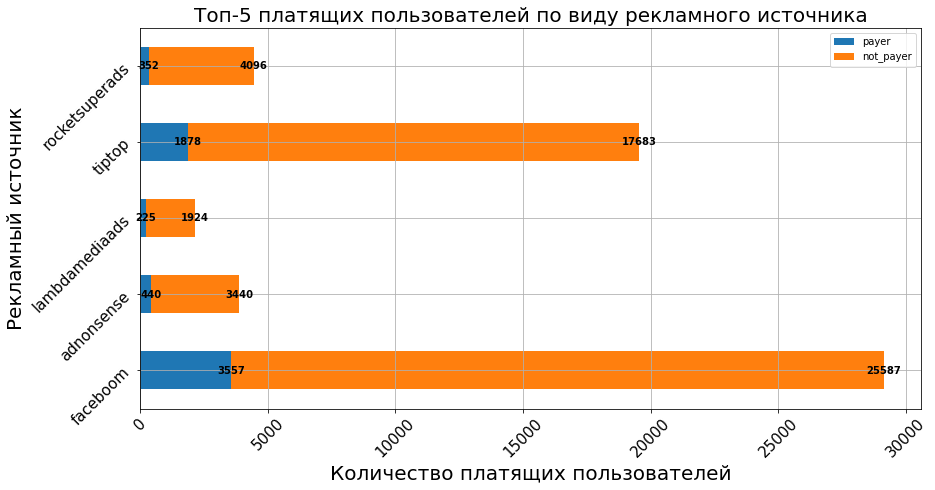

In [37]:
ax = (channel_df.sort_values('ratio_payer', ascending=False)
      .loc['faceboom':, ['payer', 'not_payer']].head()
      .plot(kind='barh', stacked=True, figsize=(14,7)))

# стилизация
plt.title('Топ-5 платящих пользователей по виду рекламного источника', fontsize=20)
plt.ylabel('Рекламный источник', fontsize=20)
plt.xlabel('Количество платящих пользователей', fontsize=20)

plt.xticks(rotation=45, fontsize=15)
plt.yticks(rotation=45, fontsize=15)
plt.grid()

# аннотация
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    plt.annotate(str(int(width)), xy=(left+width, bottom+height/2), 
                 ha='center', va='center', fontweight='bold')

<a id='4_8'></a>
#### Вывод

На основании результата сводной таблицы можно сделать следующие выводы:

Средний процент платящих пользователей составляет 5.92%. Это означает, что из 100 пользователей, увидевших рекламу, 6 человек платят за неё.
Самым эффективным каналом для привлечения платящих пользователей является Faceboom. Здесь процент платящих пользователей составляет 12.20%.
Другие эффективные каналы для привлечения платящих пользователей:
- Adnonsense (11.34%)
- Lambdamediaads (10.47%)
- Tiptop (9.60%)
- Rocketsuperads (7.91%)

И лишь 2% пользователей становятся платящими по источнику organic.

<div class="alert alert-success">
<b>Комментарий ревьюера v.1</b> 
    
👍 По источникам тоже все верно. Мы также можем выделить источники с низкими значениями долей платящих пользователей, которые сопоставимы с таковыми для органического трафика, это источники - `OppleCreativeMedia`,`YRabbit`,`MediaTornado`,`LeapBob`.
    
--- 
    
В целом в этом блоке все было сделано корректно - определены регион / устройство / канал, приносящие больший процент платящих пользователей. Также хотел оставить несколько альтернативных решений:
    
1. когда мы делаем одни и те же вычисления на разных данных - можно сделать одну функцию, которая будет выводить нужные данные;
2. также посмотри, пожалуйста, как можно решить подобную задачу с использованием группировки данных с расчетом доли платящих пользовтелей:
    
</div>

In [38]:
# ячейка ревьюера:

# задаем датасет и столбец по которому будем считать, еще задаем сам признак по умолчанию:
def payer_share(df, column, column_to_cal = 'payer'): 
    result = (df
         .groupby(column)
         .agg(users_num = (column_to_cal,'count'),
              payed_users = (column_to_cal,'sum'),
              payed_part = (column_to_cal,'mean'))
         .reset_index()
         .sort_values(by=('payed_part'), ascending=False)
         .append({column: 'total', 
                  'users_num': df[column_to_cal].count(), 
                  'payed_users': df[column_to_cal].sum(), 
                  'payed_part': df[column_to_cal].mean()}, ignore_index=True)
             )
    return result

payer_share(profiles, 'device').style.format({'payed_part': '{:.1%}','payed_users_num': '{:.0f}'})

,device,users_num,payed_users,payed_part
0,mac,30042,1912,6.4%
1,iphone,54479,3382,6.2%
2,android,35032,2050,5.9%
3,pc,30455,1537,5.0%
4,total,150008,8881,5.9%


<a id='5'></a>
### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

In [39]:
# взглянем на общую сумму всех расходов на рекламу
total_sum_on_ad = costs_info.costs.sum()
print(f'общая сумма всех расходов на рекламу составляет - {total_sum_on_ad.round(2)}$')

общая сумма всех расходов на рекламу составляет - 105497.3$


In [40]:
# выясним сколько денег потратили на каждый рекламный источник
pivot_costs = costs_info.pivot_table(index='channel', 
                                     values='costs', 
                                     aggfunc='sum').sort_values(by='costs',ascending=False)

# добавим процентное соотношение от всей суммы трат на рекламу
pivot_costs['percent'] = pivot_costs.costs / total_sum_on_ad * 100
pivot_costs

,costs,percent
channel,,
tiptop,54751.30,51.898295
faceboom,32445.60,30.754910
wahoonetbanner,5151.00,4.882589
adnonsense,3911.25,3.707441
opplecreativemedia,2151.25,2.039152
rocketsuperads,1833.00,1.737485
leapbob,1797.60,1.703930
lambdamediaads,1557.60,1.476436
mediatornado,954.48,0.904744


<div class="alert alert-warning">
<b>Комментарий ревьюера v.1</b> 

📝 В этой таблице мы можем также подсчитать процент, выделенных на каждый источник средств. Это поможет наглядно показать долю средств направленных на два первых источника (на остальные источники было выделено на порядок меньше). Также мы можем уже на этом этапе сказать, что если реклама не будет окупаться - то мы знаем, на какие источники стоит в первую очередь обратить внимание. 
    
</div>

<div class="alert alert-info"> 
<b>Комментарий студента v.1</b> 
    
Добавил! скорее всего есть более простой способ добавить новый столбец.. (как смог🤔)
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v.2</b> 
    
👍 Спасибо, теперь понятно, что около 82% бюджета было задействовано на два источника. По поводу добавления нового столбца. В целом такой подход корректный. Можно использовать `assign`:
</div>

In [59]:
# ячейка ревьюера:

# выясним сколько денег потратили на каждый рекламный источник
pivot_costs = costs_info.pivot_table(index='channel', 
                                     values='costs', 
                                     aggfunc='sum').sort_values(by='costs',ascending=False).assign(
                                     share = lambda x: x['costs'] / x['costs'].sum() * 100)

# добавим процентное соотношение от всей суммы трат на рекламу
pivot_costs['percent'] = pivot_costs.costs / total_sum_on_ad * 100
pivot_costs

,costs,share,percent
channel,,,
tiptop,54751.30,51.898295,51.898295
faceboom,32445.60,30.754910,30.754910
wahoonetbanner,5151.00,4.882589,4.882589
adnonsense,3911.25,3.707441,3.707441
opplecreativemedia,2151.25,2.039152,2.039152
rocketsuperads,1833.00,1.737485,1.737485
leapbob,1797.60,1.703930,1.703930
lambdamediaads,1557.60,1.476436,1.476436
mediatornado,954.48,0.904744,0.904744


<div class="alert alert-success">
<b>Комментарий ревьюера v.2</b> 
    
👍 Кстати, `lambda` функцию можно сразу в сводную таблицу интегрировать:
</div>

In [63]:
# ячейка ревьюера:

# выясним сколько денег потратили на каждый рекламный источник
pivot_costs = costs_info.pivot_table(index='channel', 
                                     values='costs', 
                                     aggfunc=lambda x: x.sum() / costs_info['costs'].sum() * 100).sort_values(by='costs',ascending=False)
pivot_costs

,costs
channel,
tiptop,51.898295
faceboom,30.754910
wahoonetbanner,4.882589
adnonsense,3.707441
opplecreativemedia,2.039152
rocketsuperads,1.737485
leapbob,1.703930
lambdamediaads,1.476436
mediatornado,0.904744


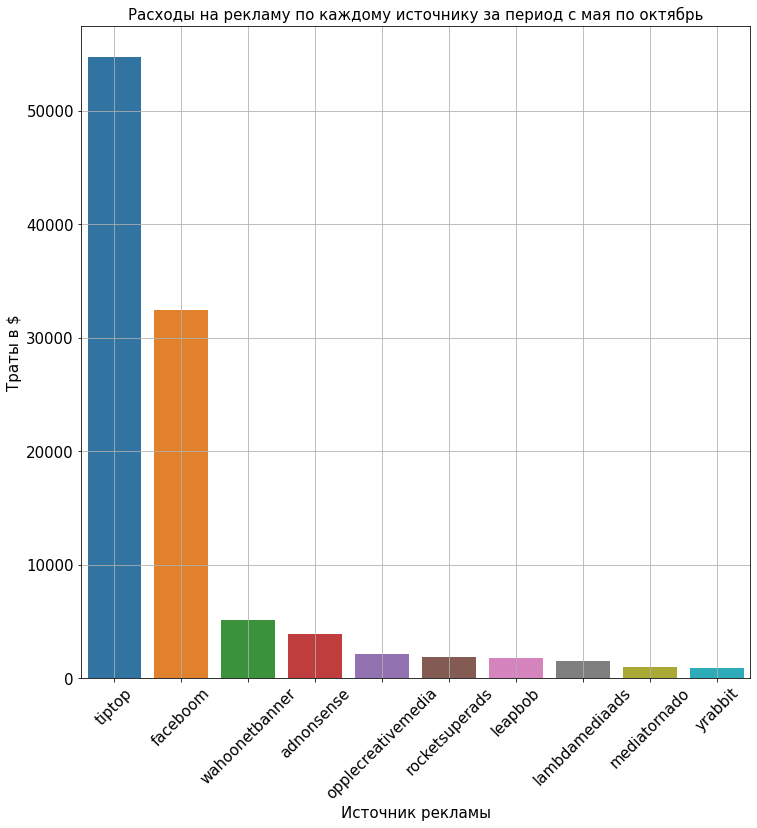

In [60]:
# задаем размер полотна
plt.subplots(figsize = (12,12))

# строим график
sns.barplot(x=pivot_costs.index, y=pivot_costs.costs.values)

# стилизация
plt.title('Расходы на рекламу по каждому источнику за период с мая по октябрь', fontsize=15)
plt.xlabel('Источник рекламы', fontsize=15)
plt.ylabel('Траты в $', fontsize=15)

plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=15)
plt.grid()

Визуализируем график динамики изменения расходов во времени по месяцам по каждому источнику.

In [42]:
# прежде чем построим графики вытащим месяц и номер недели из столбца dt
costs_info['month'] = pd.to_datetime(costs_info.dt).dt.month
costs_info['week'] = pd.to_datetime(costs_info['dt']).dt.isocalendar().week
costs_info

,dt,channel,costs,month,week
0,2019-05-01,faceboom,113.3,5,18
1,2019-05-02,faceboom,78.1,5,18
2,2019-05-03,faceboom,85.8,5,18
3,2019-05-04,faceboom,136.4,5,18
4,2019-05-05,faceboom,122.1,5,18
...,...,...,...,...,...
1795,2019-10-23,lambdamediaads,4.0,10,43
1796,2019-10-24,lambdamediaads,6.4,10,43
1797,2019-10-25,lambdamediaads,8.8,10,43
1798,2019-10-26,lambdamediaads,8.8,10,43


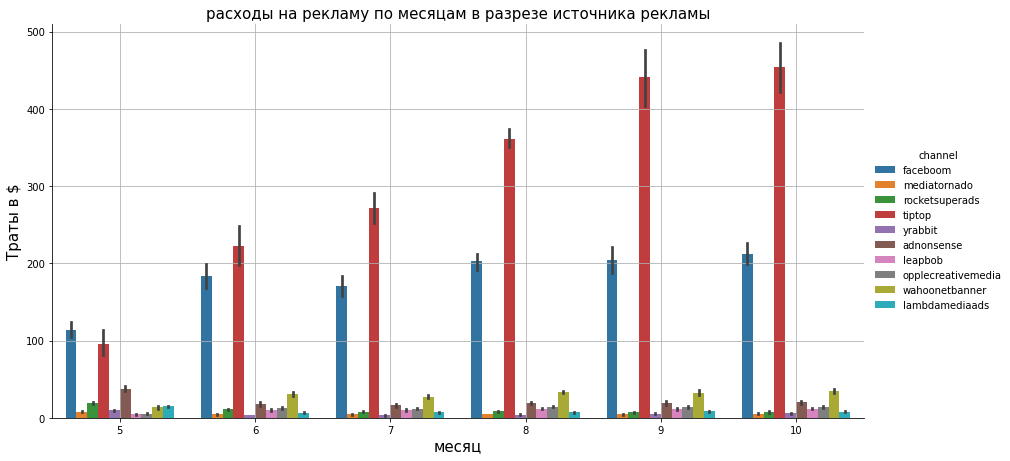

In [43]:
sns.catplot(data=costs_info, x='month', y='costs', hue='channel', kind='bar', height=6, aspect=2)

#стилизуем
plt.title('расходы на рекламу по месяцам в разрезе источника рекламы', fontsize=15)
plt.xlabel('месяц', fontsize=15)
plt.ylabel('Траты в $', fontsize=15)

plt.grid()
None

<div class="alert alert-danger">
<b>Комментарий ревьюера v.1</b> 
    
✍ Акмаль, согласно заданию, нам в этом разделе нужно построит два графика:
1. недельная динамика расходов по каналам;
1. месячная динамика расходов по каналам;
    
Для этого лучше выбрать или линейные графики или графики с областью накопления. Пожалуйста, скорректируй проект в этом блоке.
</div>

<div class="alert alert-info"> 
<b>Комментарий студента v.1</b> 
    
Алексей, я долго не мог понять как сделать визуализацию по неделям и месяцам на одном графике (в задании так написано), благодаря твоему замечанию понял, что на одном холсте можно сделать 2 графика, спасибо! Замечания учтены, графики построены.
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v.2</b> 
    
👍 Да, все верно! Спасибо, что разобрался с этим моментом! По результатам вопросов нет.
</div>

In [44]:
# составление сводных таблиц для построения графиков
costs_week = costs_info.pivot_table(index='channel', columns='week', values='costs', aggfunc='sum')
costs_month = costs_info.pivot_table(index='channel', columns='month', values='costs', aggfunc='sum')

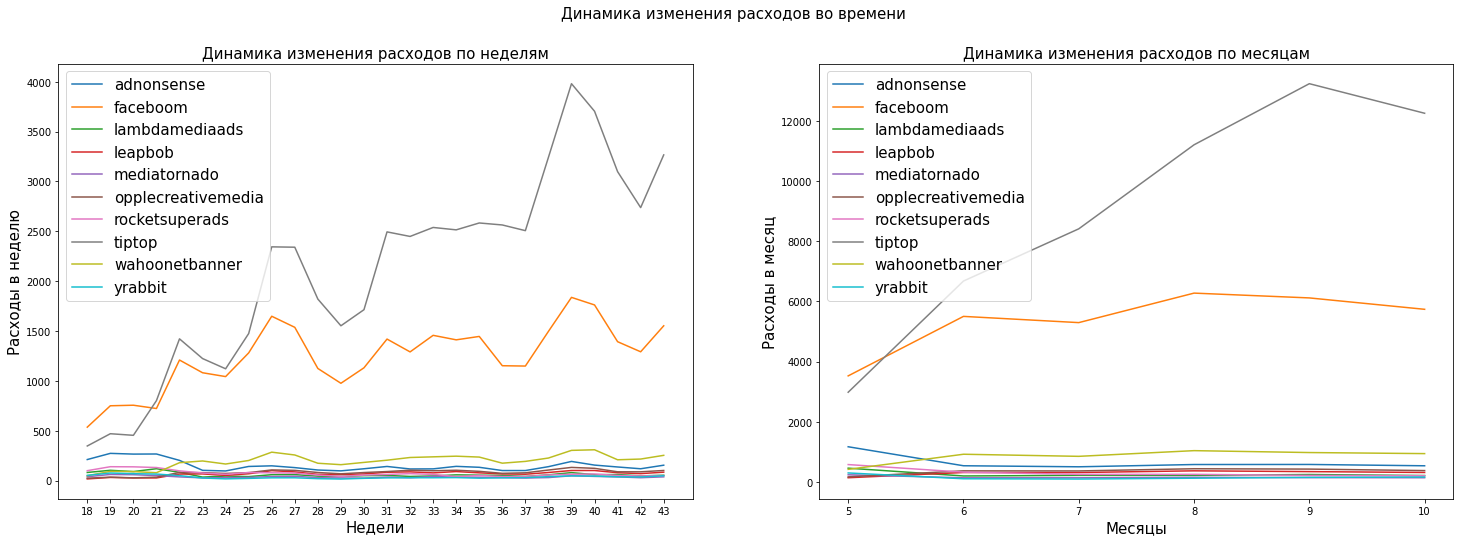

In [45]:
plt.suptitle('Динамика изменения расходов во времени', fontsize=15)

# построение графика динамики изменения расходов по неделям
costs_week.T.plot(xticks=list(costs_week.columns.values),figsize=(25, 8), ax=plt.subplot(1, 2, 1))
plt.title('Динамика изменения расходов по неделям', fontsize=15)
plt.xlabel('Недели', fontsize=15)
plt.ylabel('Расходы в неделю', fontsize=15)
plt.legend(fontsize=15)

# построение графика динамики изменения расходов по месяцам
costs_month.T.plot(xticks=list(costs_month.columns.values),figsize=(25, 8), ax=plt.subplot(1, 2, 2))
plt.title('Динамика изменения расходов по месяцам', fontsize=15)
plt.xlabel('Месяцы', fontsize=15)
plt.ylabel('Расходы в месяц', fontsize=15)
plt.legend(fontsize=15)
None

<div class="alert alert-success">
<b>Комментарий ревьюера v.2</b> 
    
📝 По этому разделу есть некоторые рекомендации:
- сейчас недели и месяца выделены в виде цифр - что для недель не очень удобно, поскольку мы не привыкли к такому виду; лучше использовать методы выделения месяца и недель типа `datetime64`;    
- также мы можем использовать диаграммы с накоплением - это позволит оценить общие затраты.
    
Посмотри, пожалуйста, ниже пример:
</div>

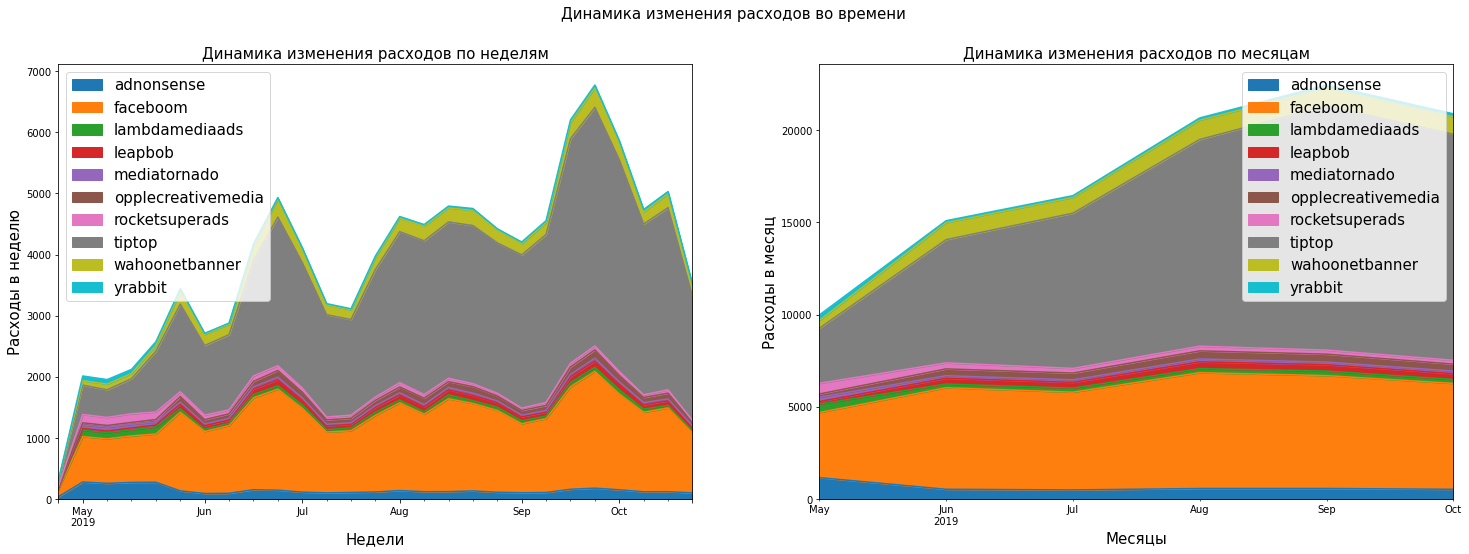

In [69]:
# ячейка ревьюера:
tmp = costs_info.copy()
tmp['week'] = tmp['dt'].astype('datetime64[W]')
tmp['month'] = tmp['dt'].astype('datetime64[M]')

# составление сводных таблиц для построения графиков
tmp_week = tmp.pivot_table(index='channel', columns='week', values='costs', aggfunc='sum')
tmp_month = tmp.pivot_table(index='channel', columns='month', values='costs', aggfunc='sum')
plt.suptitle('Динамика изменения расходов во времени', fontsize=15)

# построение графика динамики изменения расходов по неделям
tmp_week.T.plot.area(figsize=(25, 8), ax=plt.subplot(1, 2, 1))
plt.title('Динамика изменения расходов по неделям', fontsize=15)
plt.xlabel('Недели', fontsize=15)
plt.ylabel('Расходы в неделю', fontsize=15)
plt.legend(fontsize=15)

# построение графика динамики изменения расходов по месяцам
tmp_month.T.plot.area(figsize=(25, 8), ax=plt.subplot(1, 2, 2))
plt.title('Динамика изменения расходов по месяцам', fontsize=15)
plt.xlabel('Месяцы', fontsize=15)
plt.ylabel('Расходы в месяц', fontsize=15)
plt.legend(fontsize=15)
None

Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника.

In [46]:
# сгруппируем датасет с профилями по источникам рекламы, исключая organic (траты на органику отсутствуют)
# подсчитаем среднюю и отсортируем по убыванию
cac_profiles = (profiles[profiles.channel != 'organic']
                .groupby('channel')['acquisition_cost']
                .mean().sort_values(ascending=False))
# ресетним индексы и переименуем колонку
cac_profiles = cac_profiles.reset_index().rename(columns={'acquisition_cost':'cac'})
#output
cac_profiles

,channel,cac
0,tiptop,2.799003
1,faceboom,1.113286
2,adnonsense,1.008054
3,lambdamediaads,0.724802
4,wahoonetbanner,0.602245
5,rocketsuperads,0.412095
6,opplecreativemedia,0.250000
7,yrabbit,0.218975
8,mediatornado,0.218717
9,leapbob,0.210172


#### Вывод

Исхоодя из результатов проделанной работы по маркетингу можно сделать следующие выводы:
- общая сумма всех расходов на рекламу составляет - 105497.3 долларов
- больше всего было потрачено на:
    - tiptop (54751.30)
    - faceboom (32445.60)
    - wahoonetbanner (5151.00)
    - adnonsense (3911.25)
    - opplecreativemedia (2151.25)
- на графике разбивки трат на рекламу по месяцам видно, что траты на рекламу в tiptop увеличились сначала лета и продолжают расти
- траты на faceboom держат планку
- стоит заметить что стоимость привлечения пользователя из tiptop самая дорогая почти 3 доллара, в то время как у yrabbit, mediatornado, leapbob самая низкая.

<div class="alert alert-success">
<b>Комментарий ревьюера v.1</b> 
    
👍 По основным выводам все верно - важно было отметить, что есть два источника, которые являются главными потребителями рекламного бюджета, поэтому, если реклама не окупается, то в целом понятно, на что следует обратить внимание в первую очередь.
</div>

<a id='6'></a>
### Оценка окупаемости рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

<a id='6_1'></a>
#### Анализ окупаемости рекламы
Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.

In [47]:
# исключим из анализа окупаемости рекламы источник - organic, так как на него не тратим денег
profiles = profiles[profiles.channel != 'organic']

<div class="alert alert-success">
<b>Комментарий ревьюера v.1</b> 
    
👍 Верно! За привлечение органического трафика компания не платила, если мы включим, то мы можем иказить данные по окупаемости вложений в рекламу.

</div>

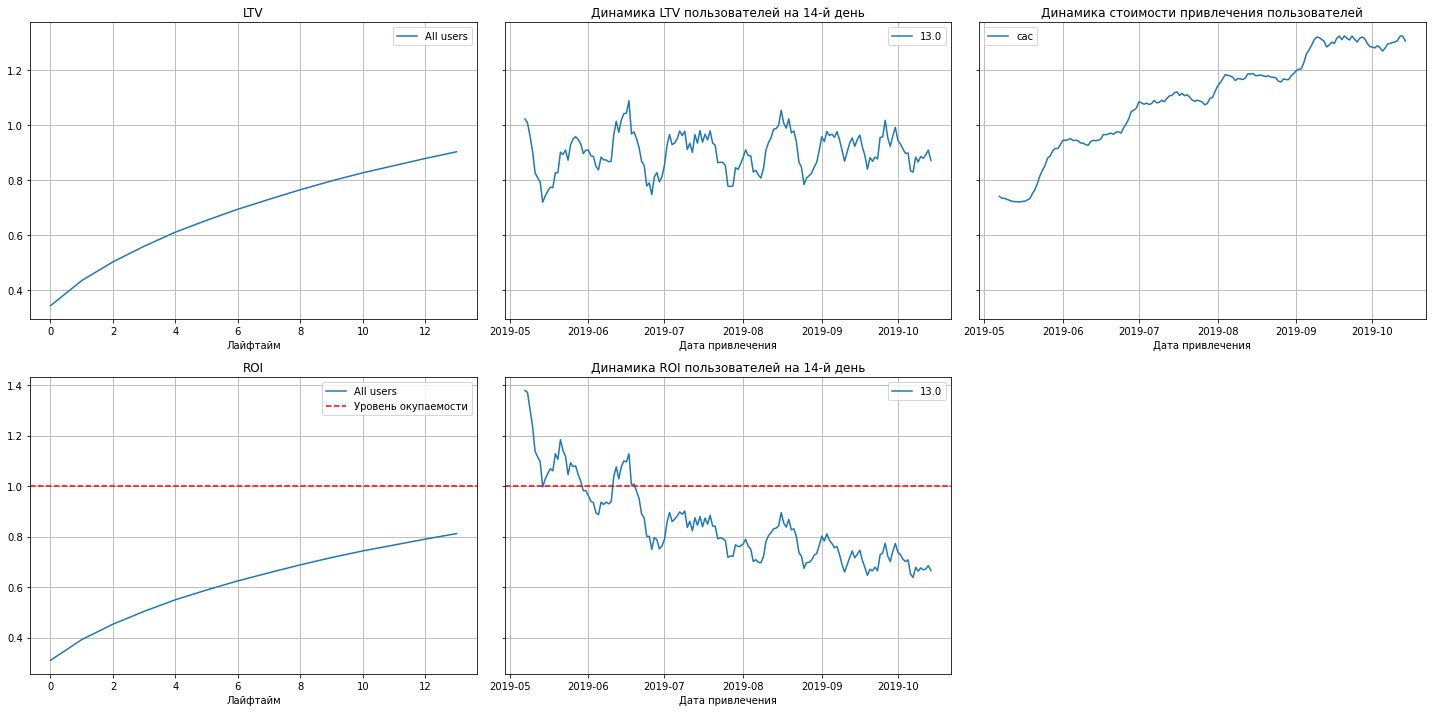

In [48]:
# с помощью функции get_ltv подсчитаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles, 
                                                                      orders, 
                                                                      observation_date, 
                                                                      horizon_days
                                                                     )

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

На основе графиков можно сделать следюущие выводы:

- LTV не достигает 1, это может говорить о том, что средняя прибыль, получаемая от одного клиента за весь период его взаимодействия с продуктом, недостаточна для окупаемости затрат на привлечение и удержание клиента;

<div class="alert alert-warning">
<b>Комментарий ревьюера v.1</b> 
    
📝 Этот вывод более справедлив про `ROI` - показывает отношение LTV к CAC, а сами значения LTV могут быть любыми, все будет зависеть от средней стоимости покупки на одного посетителя.

</div>

- реклама не окупается;
- САС растет, значит рекламный бюджет увеличивается;
- ROI на 12 лайфтайм не достигло уровня окупаемости, это может означать, что мы еще не получили достаточного количества дохода от инвестиций в рекламу, чтобы покрыть затраты на привлечение пользователей;
- начиная с июня привлеченные клиенты перестают окупаться в двух-недельном лайфтайме.


<div class="alert alert-warning">
<b>Комментарий ревьюера v.1</b> 
    
📝 В целом выводы верные, но мы должны смотреть на 12, а на 14 день, поэтому, выводы стоит подправить.

</div>

<div class="alert alert-info"> 
<b>Комментарий студента v.1</b> 
    
- стоимость привлечения пользователя со временем увеличивается, при этом вложения не окупаются; она окупалась только в мае-июне. CAC может быть каким угодно в зависимости, например, от того, какая цена рекламы была установлена
- примерно с июня пользователи перестали окупаться в двухнедельном лайфтайме;
- LTV достаточно стабилен, не замечено влияние сезонности. Значит, дело не в ухудшении качества пользователей. LTV в компаниях, как правило, постоянно растет. Если бы мы увидели падение, это бы означало, скорее всего, наличие ошибки в расчетах. Но на графике LTV стабилен.
- На графике явно видим, что реклама не окупается (ROI ниже единицы).
</div>


<div class="alert alert-success">
<b>Комментарий ревьюера v.2</b> 
    
👍 Спасибо, что скорректировал выводы.
</div>

<a id='6_2'></a>
#### Анализ конверсии пользователей и динамика ее изменения
Проверим конверсию пользователей и динамику её изменения. То же самое сделаем с удержанием пользователей. Построим и изучим графики конверсии и удержания.

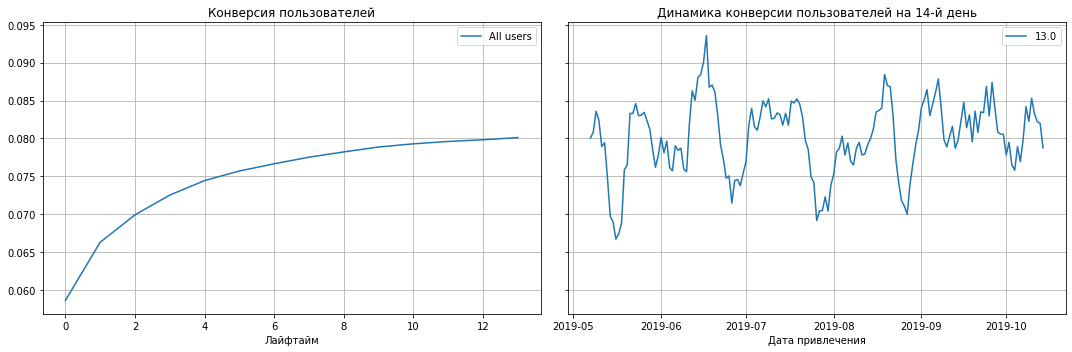

In [49]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(profiles, 
                                                                        orders, 
                                                                        observation_date, 
                                                                        horizon_days
                                                                       )

plot_conversion(conversion_grouped, conversion_history, horizon_days)

- Показатель конверсии растет к 14 дню
- Сильные просадки в конверсии на 14 день можно наблюдать в середине Мая, конце Июня, Июля и Августа

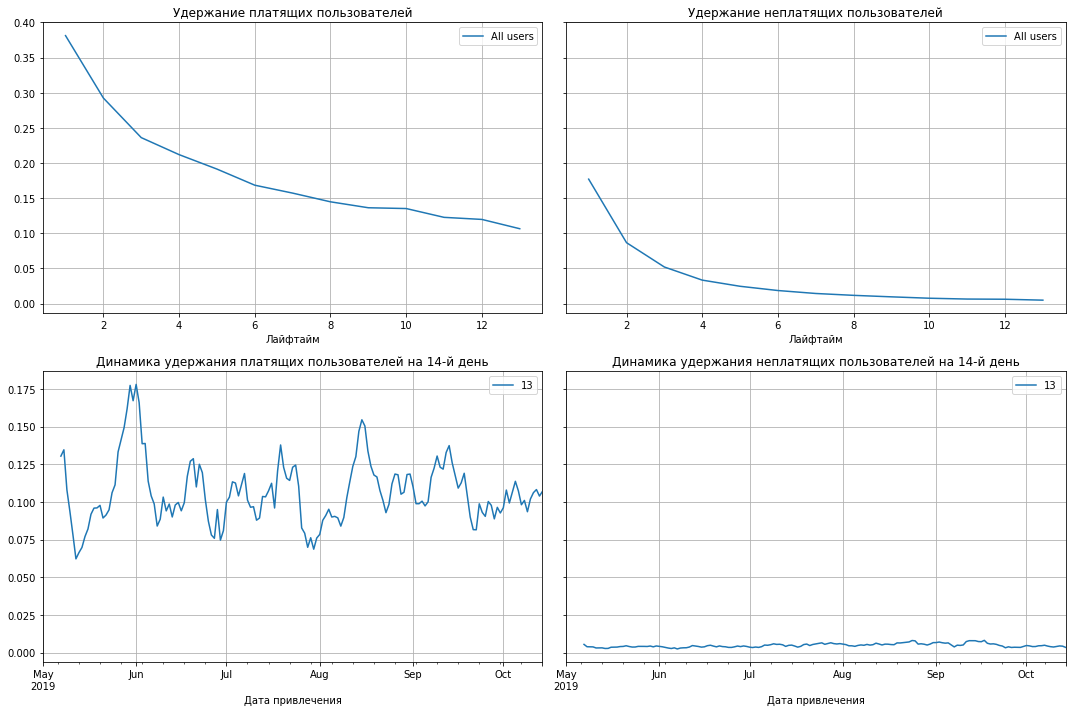

In [50]:
retention_raw, retention_grouped, retention_history = get_retention(profiles, 
                                                                    visits, 
                                                                    observation_date, 
                                                                    horizon_days
                                                                   )

plot_retention(retention_grouped, retention_history, horizon_days) 

- Показатель удержания к 14 дню снижается более чем вдвое
- В разрезе удержания по месяцам, мы видим, что удержание на 14 день сильно увеличивается в начале июня и середине августа
- Также заметно падение удержания в середине Мая, начале Июня и конце Июля

<div class="alert alert-success">
<b>Комментарий ревьюера v.1</b> 
    
👍 По интерпретации результатов в этом блоке все корректно. Молодец, что приводишь изменения динамики метрик. Кстати, хорошо видно, что конверсия на 14 день выходит на плато, видимо, поэтому и используется такой горизонт анализа.

</div>

<a id='6_3'></a>
#### Анализ окупаемости рекламы с разбивкой по устройствам
Проанализируем окупаемость рекламы с разбивкой по устройствам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

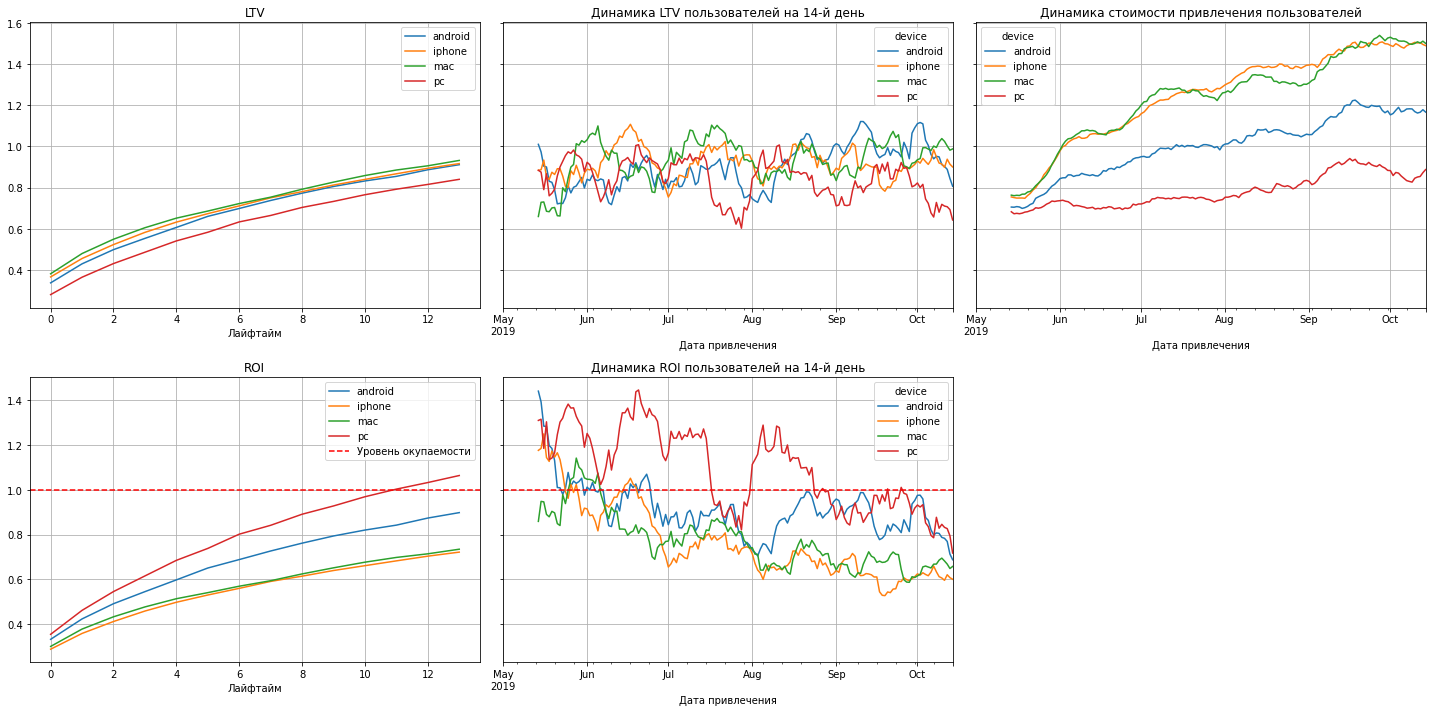

In [51]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles, 
                                                                      orders, 
                                                                      observation_date, 
                                                                      horizon_days, 
                                                                      dimensions=['device']
                                                                     )

plot_ltv_roi(ltv_grouped, 
             ltv_history, 
             roi_grouped, 
             roi_history, 
             horizon_days, 
             window=14
            )

На основе графиков LTV, ROI и их динамики, мы можем сделать следующие выводы:

1. PC: рекламные кампании на компьюетарх показывают хорошие результаты в окупаемости. ROI также является достаточно высоким, что говорит о том, что вложения в рекламу окупаются (единственные устройства, которые окупаются).

2. CAC растет на всех платформах.

3. LTV стабилен везде.

4. Mac и iphone: Рекламные кампании на яблочных устройствах показывают наименьшую окупаемость среди всех типов устройств. ROI для этой категории ниже, что может быть связано с  меньшей готовностью пользователей тратить деньги на этой платформе.

Исходя из анализа графиков LTV, ROI, динамики LTV, CAC и ROI с разбивкой по устройствам, можно заключить, что рекламные кампании на  ПК показывают наилучшую окупаемость, в то время как реклама на технике Apple требует более пристального внимания и возможно требует корректировки стратегий.

<div class="alert alert-success">
<b>Комментарий ревьюера v.1</b> 
    
👍 Все верно! Можно также отметить, что мы не можем выделить какие-то резкие изменения - действительно, вероятно, основная проблема с плохой окупаемостью рекламы не связана только с типом устройства, а с растущим САС. Еще хотел бы отметить такой момент, что `ROI` PC достигает 1.1 - это нельзя сказать, что высокие значения - они выше 1, т.е. вышли за уровень окупаемости, но все равно около 1. 
</div>


<a id='6_4'></a>
#### Анализ окупаемости рекламы с разбивкой по странам
Проанализируем окупаемость рекламы с разбивкой по странам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

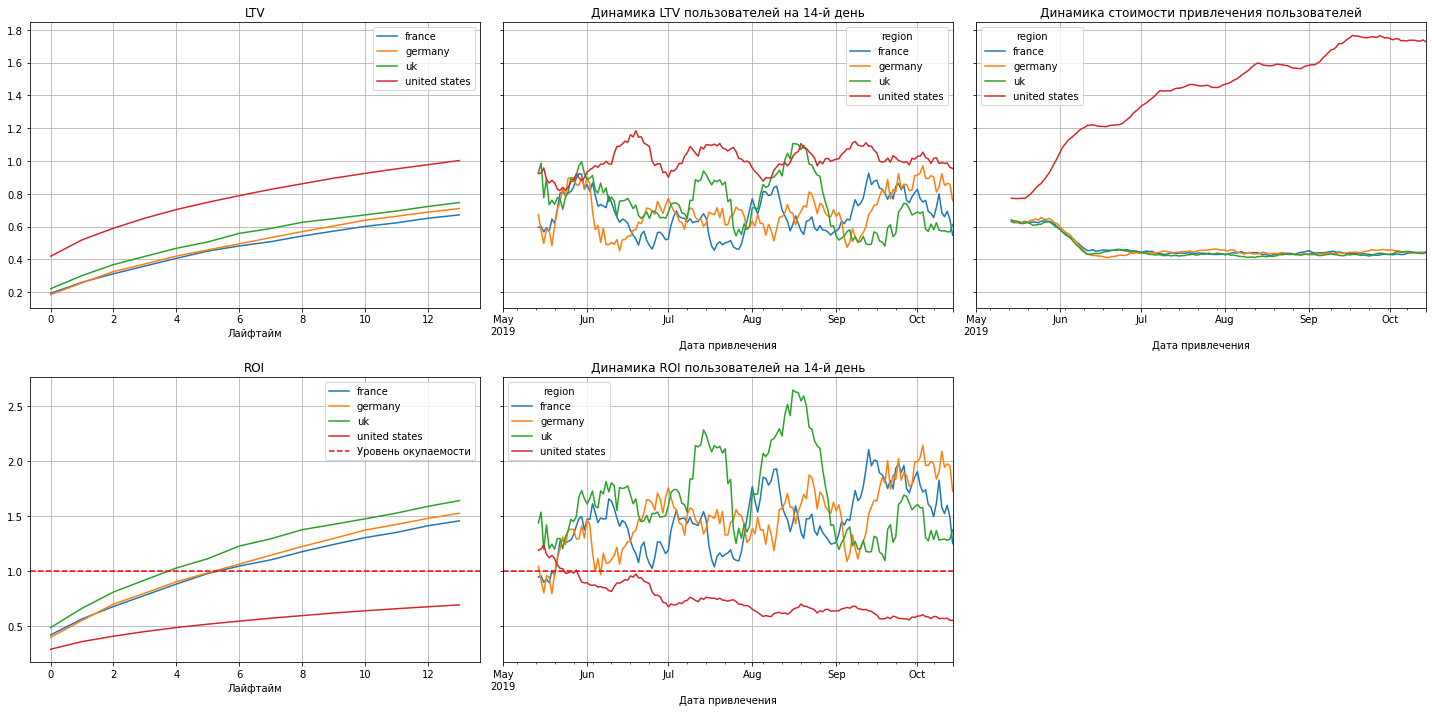

In [52]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles, 
                                                                      orders, 
                                                                      observation_date, 
                                                                      horizon_days, 
                                                                      dimensions=['region']
                                                                     )

plot_ltv_roi(ltv_grouped, 
             ltv_history, 
             roi_grouped, 
             roi_history, 
             horizon_days, 
             window=14
            )

На основании графиков LTV и ROI,а также графиков динамики LTV, CAC и ROI мы можем сделать следующие выводы:

1. несмотря на огромное количество привлеченных пользователей из США, толку от них для приложения нет, они быстро приходят и так же быстро уходят.

<div class="alert alert-warning">
<b>Комментарий ревьюера v.1</b> 
    
📝 В этом блоке мы не знаем, когда пользователи уходят - поскольку за это отвечает удержание, поэтому, тут лучше говорить, что привлечение пользователей не окупается. Также обрати внимание, что `LTV` пользователей из США высокие - т.е. пользователи хорошего качества, но их привлечение очень резко растет, что снижает окупаемость. 
    
</div>

2. затраты на рекламу в Европе остаются неизменными и окупаются и это говорит о том, что рекламная кампания в Европе показывает отличные результаты в окупаемости. LTV и ROI значительно выше, что указывает на то, что пользователи  из этих стран готовы тратить больше денег на услугу, а вот в США количество пользователей растут и перестали окупаться с июня.

<div class="alert alert-warning">
<b>Комментарий ревьюера v.1</b> 
    
📝 Проверь, пожалуйста, вывод про `LTV` пользователей из стран Европы.
    
</div>


Основываясь на анализе графиков  с разбивкой по странам, можно заключить, что рекламные кампании в Европе наиболее эффективны с точки зрения окупаемости.

<div class="alert alert-success">
<b>Комментарий ревьюера v.1</b> 
    
👍 Основной вывод верный! Но, пользователи из `США` наша основная аудитория, поэтому нужно изучать причины провальной рекламной кампании дальше.

</div>

<div class="alert alert-info"> 
<b>Комментарий студента v.1</b> 
    
- Реклама не окупается только в США. И только в этой стране растет стоимость привлечения. При этом LTV - самый высокий среди представленных стран.
- В Европе во всех странах вложения в рекламу примерно одинаковые, постоянные и пользователи европейских стран окупаются.
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v.2</b> 
    
👍 Спасибо, что скорректировал выводы, комментариев больше нет :)
</div>

<a id='6_5'></a>
#### Анализ окупаемости рекламы с разбивкой по рекламным каналам
Проанализируем окупаемость рекламы с разбивкой по рекламным каналам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

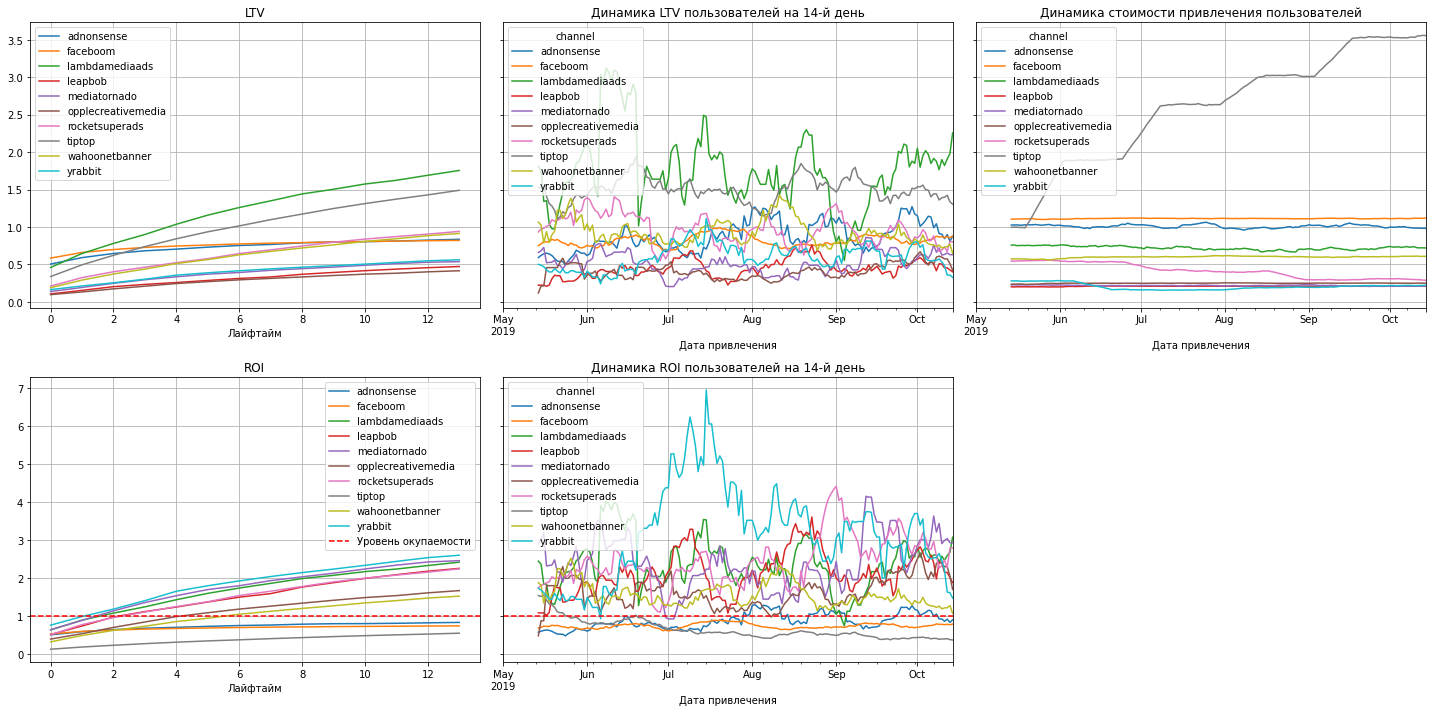

In [53]:
# с помощью функции get_ltv подсчитаем LTV и ROI с разбивкой по каналам
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles, 
                                                                      orders, 
                                                                      observation_date, 
                                                                      horizon_days, 
                                                                      dimensions=['channel']
                                                                     )
# строим графики
plot_ltv_roi(ltv_grouped, 
             ltv_history, 
             roi_grouped, 
             roi_history, 
             horizon_days, 
             window=14
            )

По итогам ознакомления этих графиков можно сделать следующие выводы:
- На двухнедельном лайфтайме затраты на faceboom, tiptop, adnonsense не окупаются, а на них уходит больше половина всего рекламного бюджета. 
- Расходы на рекламу TipTop увеличиваются каждый месяц
- Перспективным каналом считается lambdaMediaAds - низкая стоимость привлечения (0,72) и высокие показатели пожизненной ценности пользователя.

<div class="alert alert-success">
<b>Комментарий ревьюера v.1</b> 
    
👍 Общие выводы по окупаемости каналов сделаны верно.
    
</div>

<a id='6_6'></a>
#### Вывод
*Окупается ли реклама, направленная на привлечение пользователей в целом?
Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
Чем могут быть вызваны проблемы окупаемости?*

Реклама не приносит ожидаемого результата. Это связано с несколькими факторами:

- Неэффективное распределение бюджета. На нерентабельные каналы приходится большая часть средств, а перспективные площадки не получают достаточного финансирования.
- Высокая стоимость привлечения пользователей из США. При этом они плохо удерживают приложение.
- Низкая стоимость привлечения пользователей из европейских стран.
- Каналы, которые не окупаются - TipTop, FaceBoom и AdNonSense.
- один из самых проблемных каналов - FaceBoom (не окупается имея второе место по сумме затрат на рекламу, низкое удержание платящих пользователей); далее хотим отметить TipTop - неоправданно высокий рост САС, в следствие чего он через месяц перестал окупаться.

<div class="alert alert-danger">
<b>Комментарий ревьюера v.1</b> 
    
✍ Акмаль, в целом был проделан большой объем работы, но, нам нужно немного детализировать исследования в этом блоке, чтобы более детально ответить на вопрос, с чем были вызваны причины неокупаемости каналов. Если с `TipTop` все более-менее понятно - постоянно растут затраты из-за увеличения стоимости привлечения пользователя на фоне стабильного `LTV`, то вот с `FaceBoom` не до конца все ясно. В выводах указано, что проблема этого источника - низкое удержание платящих пользователей, но такого исследования не было проведено в самом проекте. Пожалуйста, добавь графики по удержанию пользователей в разрезе стран и источников, чтобы выводы базировались на результатах проекта.
    
</div>

<div class="alert alert-info"> 
<b>Комментарий студента v.1</b> 
    
Ниже создал графики по удержанию пользователей в разрезе стран и источников и немного дополнил вывод
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v.2</b> 
    
👍 Спасибо, давай посмотрим, что получилось!
</div>

<a id='6_7'></a>
#### Дополнительно

##### Графики по удержанию пользователей в разрезе по рекламным каналам

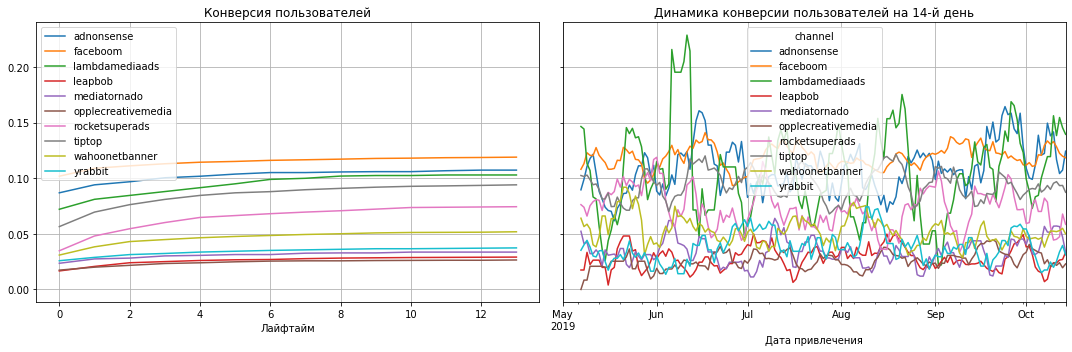

In [54]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['channel']
)

plot_conversion(conversion, conversion_history, horizon_days, window=7)

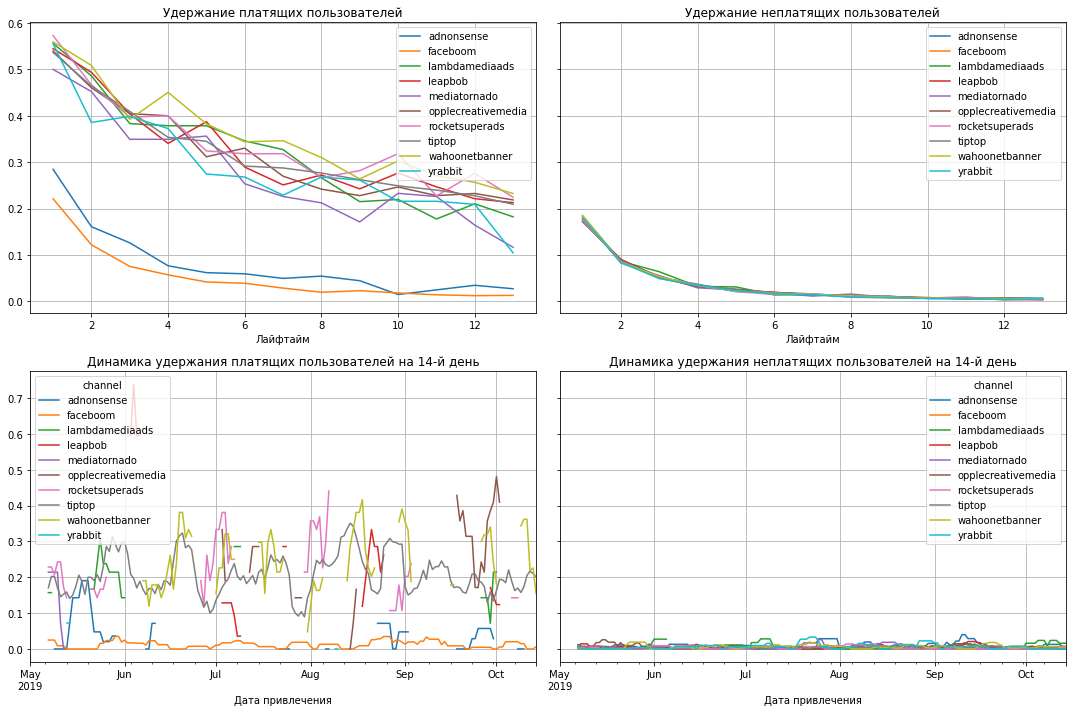

In [55]:
# формируем данные
retention_raw, retention, retention_history = get_retention(
    profiles,
    visits,
    observation_date,
    horizon_days,
    dimensions=['channel']
)

# рисуем графики
plot_retention(retention, retention_history, horizon_days, window=7)

<div class="alert alert-info"> 
<b>Комментарий студента v.1</b> 
    
- Хорошую конверсию показывают следующие каналы привлечения: FaceBoom, AdNonSense, при этом по удержанию они в аутсайдерах.
- При этом неплохие показатели удержания (среди хорошо конвертируемых) у пользователей, привлеченных через канал lambdaMediaAds и TipTop. TipTop, отличающийся дорогой рекламой, по удержанию не выделяется на общем фоне.
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v.2</b> 
    
👍 Отлично! Здорово, что отметил, что `TipTop` по удержанию не отличается от остальных каналов, и также то, что основная проблема источника `FaceBoom` - это низкое удержание. В этом его проблема - пользователям приложение не интересно, но они готовы платить (судя по конверсии).
</div>

##### Графики по удержанию пользователей в разрезе по странам

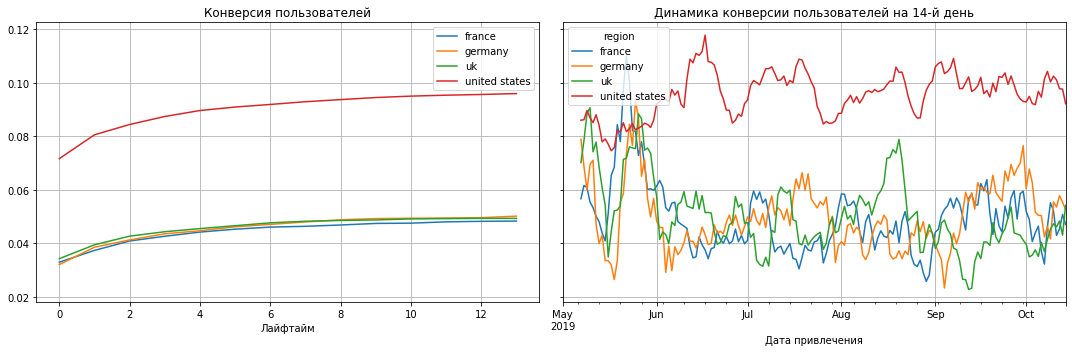

In [56]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['region']
)

plot_conversion(conversion, conversion_history, horizon_days, window=7)

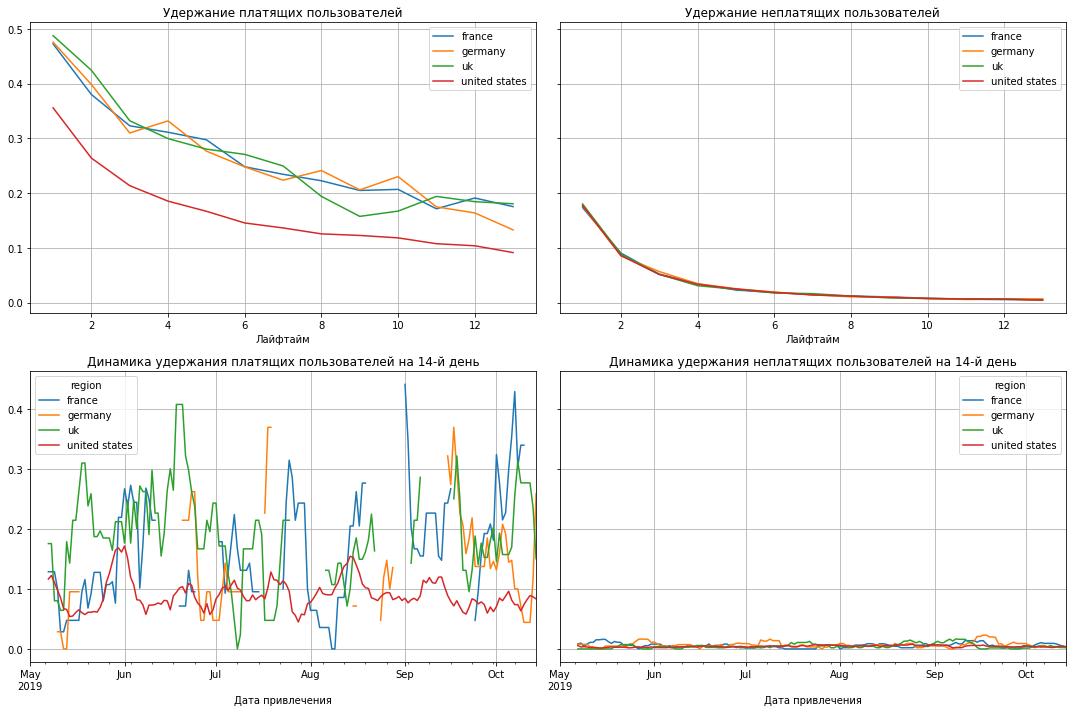

In [57]:
# формируем данные
retention_raw, retention, retention_history = get_retention(
    profiles,
    visits,
    observation_date,
    horizon_days,
    dimensions=['region']
)

# рисуем графики
plot_retention(retention, retention_history, horizon_days, window=7)

<div class="alert alert-info"> 
<b>Комментарий студента v.1</b> 
- Лучше всего конвертуруются пользователи, привлеченные из США. В остальных странах конверсия примерно одинаковая;
- При этом удержание платящих пользователей из США ниже, чем в Европе. В категории неплатящих пользователей разницы с разбивкой по регионам не наблюдается.
</div>

<div class="alert alert-info"> 
<b>Комментарий студента v.1</b> 
    
В целом реклама, направленная на привлечение пользователей не окупается. Негативное влияние на данный факт оказывет большое вложение средств в рекламные кампании Tip Top FaceBoom в США. Пользователей США преимущественно больше, с чем связано такое сильное влияние на окупаемость. Пользователи США хорошо конвертируются, но плохо удерживаются.
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v.2</b> 
    
👍 Поскольку два канала, самых популярных - `TipTop` и `FaceBoom` ориентированы  на пользователей из США, то и этот рынок будет показывать метрики, характерные для этих каналов - неплохую конверсию, высокую стоимость привлечения, низкое удержание.
</div>

<a id='7'></a>
### Итоговый вывод

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

Компания-заказчик тратит много денег на рекламу, но не получает желаемого результата. Анализ данных показал, что причина убытков - неэффективная реклама.

Самые дорогие каналы привлечения - FaceBoom, TipTop и AdNonSence. Они привлекают много пользователей, но они не платят или быстро отказываются от услуг компании. Кроме того, расходы на рекламу в TipTop растут.

Чтобы исправить ситуацию, компания должна:

Пересмотреть стратегию рекламы в США. Возможно, стоит отказаться от FaceBoom и перенаправить средства на другие каналы.
Выяснить, почему растет САС в TipTop. Если проблему нельзя решить, то нужно отказаться от этого канала.
Увеличить расходы на рекламу в RocketSuperAds, который показывает хорошие результаты.
Уделить больше внимания европейскому рынку. Возможно, стоит увеличить расходы на рекламу в lambdaMediaAds и снизить в AdNonSense.
Поработать с органическими пользователями, которые приносят компании существенный доход.

<div class="alert alert-info"> 
<b>Комментарий студента v.1</b> 
    
Алексей! Я хотел бы выразить огромную благодарность за твою тщательную проверку моего проекта. Твои замечания и предложения были истинно ценными и помогли мне осознать свои слабые стороны в когортном анализе. Да я в этой теме очень сильно плаваю и не до конца пониманию всех метрик, да и прошла середина обучения и возникла какая-то аппатия, постараюсь с ней справится и детально разобратся в когортном анализе и юнит-экономике.

Спасибо за твою четкую и объективную оценку моей работы, за твое время, усилия и обратную связь.
    
</div>


<div class="alert alert-success">
<b>Комментарий ревьюера v.2</b> 
    
👍 Акмаль, спасибо, что детально и продуктивно проработал комментарии и за обратную связь на ревью - это придает заряд положительных эмоций :) Здорово, что ревью было полезным. Мне кажется, что это один из самых интересных проектов на курсе, но в тоже время - очень сложный. Вообще юник экономика сложная, но востребованная тема, поэтому, сейчас важно познакомиться с ней и наметить дальнейшие пути развития. Уверен - все будет хорошо, при твоей мотивации и качественном подходе к созданию проектов.
    
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v.1</b> 
    
👍 Общие выводы в целом верные, был сделан верный акцент на `RocketSuperAds`.
    
</div>

[к началу](#0)